# Case-Study Title: Sports Analytics (Regression Methods in Python)
###### Data Analysis methodology: CRISP-DM
###### Dataset: Hitters dataset (Major League Baseball Data from the 1986 and 1987 seasons in US)
###### Case Goal: Annual Salary prediction of each Player in 1987 base on his performance in 1986

# Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from tensorflow import keras

# Read Data from File

In [2]:
data = pd.read_csv('CS_02.csv')

In [3]:
data.shape  # 322 records, 21 variables

(322, 21)

# Business Understanding
 * know business process and issues
 * know the context of the problem
 * know the order of numbers in the business

# Data Understanding
## Data Inspection (Data Understanding from Free Perspective)
### Dataset variables definition

In [4]:
data.columns  # KPI (Key Performance Indicator) variables

Index(['Name', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

1. KPI variables in 1986:
* **AtBat**:      Number of times at bat in 1986
* **Hits**:       Number of hits in 1986
* **HmRun**:      Number of home runs in 1986
* **Runs**:       Number of runs in 1986
* **RBI**:        Number of runs batted in in 1986
* **Walks**:      Number of walks in 1986
* **PutOuts**:    Number of put outs in 1986
* **Assists**:    Number of assists in 1986
* **Errors**:     Number of errors in 1986

2. KPI variables in whole career life:
* **Years**:      Number of years in the major leagues
* **CAtBat**:     Number of times at bat during his career
* **CHits**:      Number of hits during his career
* **CHmRun**:     Number of home runs during his career
* **CRuns**:      Number of runs during his career
* **CRBI**:       Number of runs batted in during his career
* **CWalks**:     Number of walks during his career

3. Categorical variables:
* **League**:     A factor with levels A and N indicating player's league at the end of 1986 (american league|national league)
* **Division**:   A factor with levels E and W indicating player's division at the end of 1986 (west|east)
* **NewLeague**:  A factor with levels A and N indicating player's league at the beginning of 1987
* **Name**:       name of players

4. Outcome variable:
* **Salary**:     1987 annual salary on opening day in thousands of dollars

## Data Exploring (Data Understanding from Statistical Perspective)
### Overview of Dataframe

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [7]:
data.tail()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A
321,Willie Wilson,631,170,9,77,44,31,11,4908,1457,...,775,357,249,A,W,408,4,3,1000.0,A


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

In [9]:
# Do we have any NA in our Variables?
data.isna().sum()  # count NAs in columns

# We have 56 NAs in 'Salary'

Name          0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [10]:
# Check for abnormality in data
data.describe(include='all')

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
count,322,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,...,322.000000,322.000000,322.000000,322,322,322.000000,322.000000,322.000000,263.000000,322
unique,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2
top,Andy Allanson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,A,W,NaN,NaN,NaN,NaN,A
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,175,165,NaN,NaN,NaN,NaN,176
mean,NaN,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,...,358.795031,330.118012,260.239130,NaN,NaN,288.937888,106.913043,8.040373,535.925882,NaN
std,NaN,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,...,334.105886,333.219617,267.058085,NaN,NaN,280.704614,136.854876,6.368359,451.118681,NaN
min,NaN,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,...,1.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,67.500000,NaN
25%,NaN,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,...,100.250000,88.750000,67.250000,NaN,NaN,109.250000,7.000000,3.000000,190.000000,NaN
50%,NaN,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,...,247.000000,220.500000,170.500000,NaN,NaN,212.000000,39.500000,6.000000,425.000000,NaN
75%,NaN,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,...,526.250000,426.250000,339.250000,NaN,NaN,325.000000,166.000000,11.000000,750.000000,NaN


### Dealing with MVs

In [11]:
# Remove records with MVs (remove records with NA in their 'Salary' column)
data2 = data.dropna(subset = ['Salary'], inplace = False, axis = 0)

In [12]:
# Remove Players' Name
data2 = data2.iloc[:, 1:]

In [13]:
data2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [14]:
data2.shape

(263, 20)

In [15]:
data2.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


### Univariate Profiling (check each variable individually)
#### Categorical variables
Check to sure that have good car distribution in each category

**Rule of Thumb**: we must have atleast 30 observation in each category

In [16]:
data2.League.value_counts()

A    139
N    124
Name: League, dtype: int64

In [17]:
data2.Division.value_counts()

W    134
E    129
Name: Division, dtype: int64

In [18]:
data2.NewLeague.value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

#### Continuous variables
distribution: plot Histogram

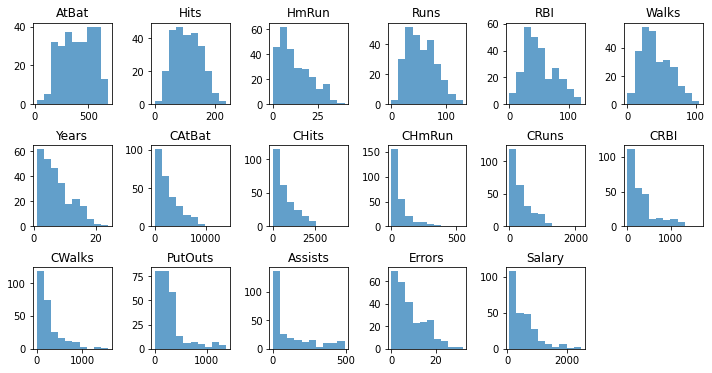

In [19]:
var_ind = list(range(13)) + list(range(15, 19))
plot = plt.figure(figsize = (12, 6))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 18):
    a = plot.add_subplot(3, 6, i)
    a.hist(data2.iloc[:, var_ind[i - 1]], alpha = 0.7)
    a.title.set_text(data2.columns[var_ind[i - 1]])

Text(0.5, 1.0, 'Boxplot of Salary')

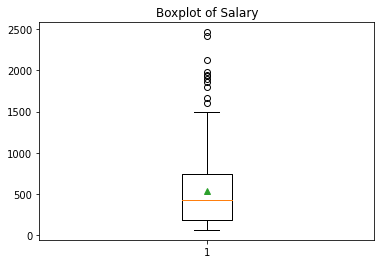

In [20]:
# Box plot of 'Salary'
plt.boxplot(data2['Salary'], showmeans = True)  # Outlier detection by Tukey method
plt.title('Boxplot of Salary')

# the outliers in this case are Nature of this problem

### Bivariate Profiling (measure 2-2 relationships between variables)
#### Two Continuous variables (Correlation Analysis)

In [21]:
# correlation table between Salary and continuous variables
corr_table = round(data2.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table  # two-by-two Pearson Correlation between variables

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.00,0.96,0.56,0.90,0.80,0.62,0.01,0.21,0.23,0.21,0.24,0.22,0.13,0.31,0.34,0.33,0.39
Hits,0.96,1.00,0.53,0.91,0.79,0.59,0.02,0.21,0.24,0.19,0.24,0.22,0.12,0.30,0.30,0.28,0.44
HmRun,0.56,0.53,1.00,0.63,0.85,0.44,0.11,0.22,0.22,0.49,0.26,0.35,0.23,0.25,-0.16,-0.01,0.34
Runs,0.90,0.91,0.63,1.00,0.78,0.70,-0.01,0.17,0.19,0.23,0.24,0.20,0.16,0.27,0.18,0.19,0.42
RBI,0.80,0.79,0.85,0.78,1.00,0.57,0.13,0.28,0.29,0.44,0.31,0.39,0.23,0.31,0.06,0.15,0.45
Walks,0.62,0.59,0.44,0.70,0.57,1.00,0.13,0.27,0.27,0.35,0.33,0.31,0.43,0.28,0.10,0.08,0.44
Years,0.01,0.02,0.11,-0.01,0.13,0.13,1.00,0.92,0.90,0.72,0.88,0.86,0.84,-0.02,-0.09,-0.16,0.40
CAtBat,0.21,0.21,0.22,0.17,0.28,0.27,0.92,1.00,1.00,0.80,0.98,0.95,0.91,0.05,-0.01,-0.07,0.53
CHits,0.23,0.24,0.22,0.19,0.29,0.27,0.90,1.00,1.00,0.79,0.98,0.95,0.89,0.07,-0.01,-0.07,0.55
CHmRun,0.21,0.19,0.49,0.23,0.44,0.35,0.72,0.80,0.79,1.00,0.83,0.93,0.81,0.09,-0.19,-0.17,0.52


> **Salary** has good correlations with features

<Axes: >

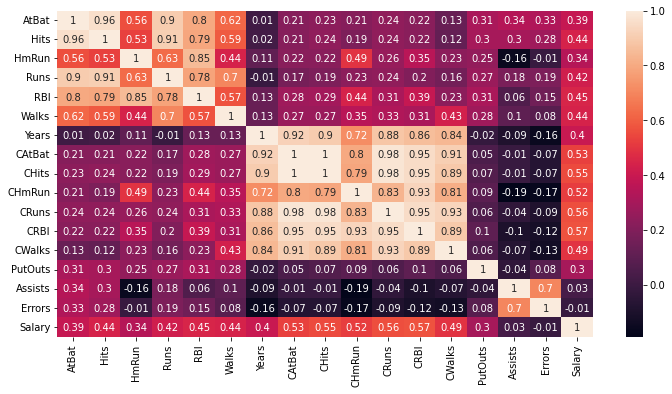

In [22]:
# Correlation plot
plt.figure(figsize = (12, 6))
sns.heatmap(corr_table, annot = True)

> **Multicollinearity** problem: we have high correlations between features with each other

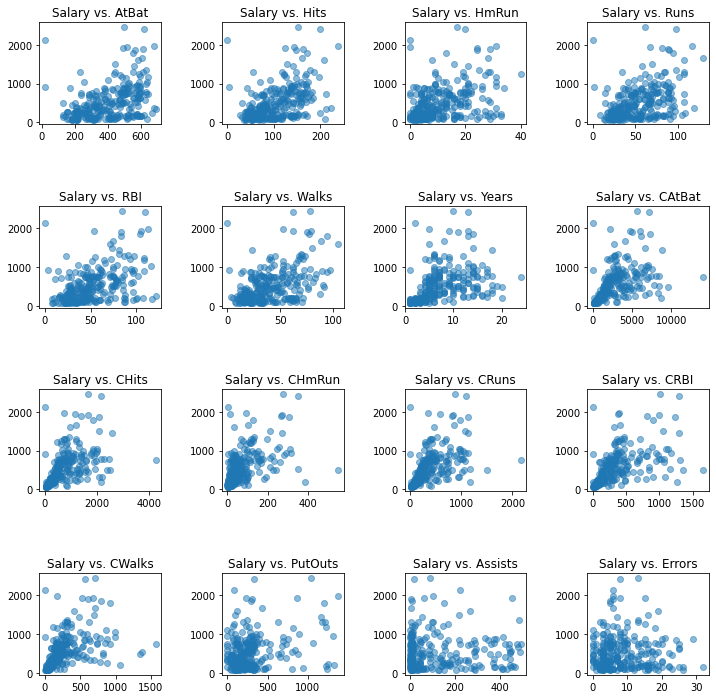

In [23]:
# Scatter Plot (between Salary and other continuous variables 2 by 2)
var_ind = list(range(13)) + list(range(15, 18))
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.8, wspace = 0.5)
for i in range(1, 17):
    a = plot.add_subplot(4, 4, i)
    a.scatter(x = data2.iloc[:, var_ind[i - 1]], y = data2.iloc[:, 18], alpha = 0.5)
    a.title.set_text('Salary vs. ' + data2.columns[var_ind[i - 1]])

> There is a good linear relationship between **Career** variables and **Salary**

# Data PreProcessing
## Divide Dataset into Train and Test randomly
* Learn model in Train dataset
* Evaluate model performance in Test dataset

In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data2, test_size = 0.2, random_state = 1234)

# according to the dataset size: 80% - 20% 

In [25]:
# train data distribution must be similar to test data distribution
train.shape

(210, 20)

In [26]:
train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,409.009524,109.923810,11.880952,55.871429,52.290476,41.838095,7.409524,2658.804762,721.333333,70.361905,360.742857,331.709524,259.609524,292.023810,111.880952,8.228571,562.288433
std,148.097730,46.149683,8.872306,25.833802,26.641091,21.846408,4.624038,2126.724958,596.666853,83.085605,307.176493,315.682880,251.547022,275.904453,143.031332,6.307521,466.852811
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,9.000000,0.000000,6.000000,7.000000,4.000000,0.000000,0.000000,0.000000,68.000000
25%,283.000000,73.000000,5.000000,34.000000,30.000000,24.000000,4.000000,928.250000,230.250000,15.000000,116.250000,99.250000,76.500000,110.250000,7.000000,3.000000,210.000000
50%,417.000000,105.500000,9.000000,53.500000,47.000000,37.500000,6.000000,2035.500000,546.500000,40.000000,278.500000,251.500000,179.500000,226.000000,41.500000,6.000000,450.000000
75%,528.750000,144.750000,18.000000,76.000000,73.000000,57.000000,11.000000,3900.250000,1058.000000,92.750000,493.500000,419.750000,318.500000,318.500000,172.250000,12.750000,761.250000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,20.000000,9528.000000,2583.000000,548.000000,1509.000000,1659.000000,1380.000000,1377.000000,492.000000,29.000000,2460.000000


In [27]:
test.shape

(53, 20)

In [28]:
test.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,382.377358,99.528302,10.584906,50.283019,48.301887,38.245283,6.924528,2652.547170,725.566038,64.792453,363.113208,325.301887,262.867925,285.509434,146.018868,10.037736,431.470491
std,143.530113,40.146177,8.284448,24.056326,22.577716,21.160473,5.445001,2857.368387,828.292045,79.190947,416.452493,355.362414,311.416370,298.059211,151.253797,7.572629,368.025230
min,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,278.000000,70.000000,3.000000,32.000000,32.000000,22.000000,3.000000,682.000000,170.000000,16.000000,93.000000,80.000000,50.000000,117.000000,9.000000,4.000000,155.000000
50%,360.000000,103.000000,9.000000,48.000000,47.000000,34.000000,5.000000,1399.000000,357.000000,36.000000,168.000000,154.000000,128.000000,203.000000,80.000000,8.000000,297.500000
75%,511.000000,138.000000,17.000000,68.000000,60.000000,56.000000,10.000000,3828.000000,970.000000,90.000000,575.000000,458.000000,359.000000,325.000000,269.000000,16.000000,670.000000
max,584.000000,163.000000,33.000000,107.000000,104.000000,83.000000,24.000000,14053.000000,4256.000000,384.000000,2165.000000,1314.000000,1566.000000,1320.000000,465.000000,32.000000,1861.460000


# Modeling
## Model 1: Simple Linear Regression

In [29]:
# Create binary dummy variables for Categorical variables (One-Hot Encoding)
dummies = pd.get_dummies(train[['League', 'Division', 'NewLeague']])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
98,0,1,0,1,0,1
206,0,1,0,1,0,1
54,1,0,1,0,1,0
177,1,0,1,0,1,0
27,0,1,0,1,0,1


In [30]:
# Define the features set X
X_ = train.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_train = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train = sm.add_constant(X_train)  # adding a constant column (a column of 1)

# Define response variable
y_train = train['Salary']

In [31]:
X_train.head()  # features matrix

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
98,1.0,415,115,27,97,71,68,3,711,184,45,156,119,99,274,2,7,1,1,1
206,1.0,407,93,8,47,30,30,2,969,230,14,121,69,68,172,317,25,1,1,1
54,1.0,403,101,12,45,53,39,12,5150,1429,166,747,666,526,316,6,5,0,0,0
177,1.0,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,0,0,0
27,1.0,474,129,10,50,56,40,10,2331,604,61,246,327,166,732,83,13,1,1,1


In [32]:
y_train.head()  # response matrix

98      300.0
206     150.0
54      675.0
177    1300.0
27      750.0
Name: Salary, dtype: float64

In [33]:
# Linear Regression model
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           4.97e-24
Time:                        00:36:53   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      0.088     -27.565     396.021
AtBat          -1.7540      0.751     -2.336      0.021      -3.235      -0.273
Hits            6.5979      2.885      2.287      0.023       0.907      12.289
HmRun           7.3090      7.597      0.962      0.337      -7.675      22.293
Runs           -2.7338      3.582     -0.763      0.446      -9.799       4.332
RBI            -1.3503      3.172     -0.426      0.671      -7.608       4.908
Walks           5.4445      2.263      2.406      0.017       0.981       9.908
Years          -6.5675     14.116     -0.465      0.642     -34.412      21.277
CAtBat         -0.2467      0.172     -1.433      0.154      -0.586       0.093
CHits           0.5802      0.895      0.648      0.518      -1.185       2.346
CHmRun          0.0299      2.025      0.015      0.988      -3.965       4.025
CRuns           1.4403      0.886      1.625      0.106      -0.308       3.189
CRBI            0.3874      0.911      0.425      0.671      -1.409       2.184
CWalks         -0.6119      0.410     -1.491      0.137      -1.421       0.197
PutOuts         0.2961      0.094      3.141      0.002       0.110       0.482
Assists         0.2956      0.249      1.187      0.237      -0.195       0.787
Errors          0.7347      5.199      0.141      0.888      -9.520      10.990
League_N        5.0153     97.960      0.051      0.959    -188.214     198.245
Division_W   -134.5539     47.964     -2.805      0.006    -229.164     -39.944
NewLeague_N    36.0810     98.757      0.365      0.715    -158.719     230.881
==============================================================================
Omnibus:                       71.108   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.871
Skew:                           1.201   Prob(JB):                     2.16e-80
Kurtosis:                       9.013   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**results**:
1. Y is so skewed
2. Multicollinearity problem
3. Not-Normality of Errors

Check Assumptions of Regression:

1. Normality of residuals (Errors)

<Axes: ylabel='Probability'>

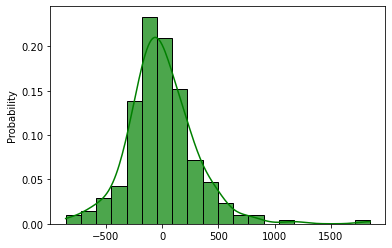

In [34]:
# Plot Histogram of residuals
sns.histplot(lm.resid, stat = 'probability',
            kde = True, alpha = 0.7, color = 'green',
            bins = 20)

# skewed to right

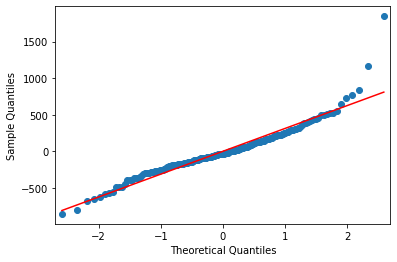

In [35]:
# QQ-plot
qqplot_lm = sm.qqplot(lm.resid, line = 's')
plt.show()

In [36]:
# Jarque-Bera Test (Normal Skewness = 0)
  # H0: the data is normally distributed
  # if p-value < 0.05, then reject normality assumption

# Omnibus K-squared normality test (Normal Kurtosis = 3)
  # H0: the data is normally distributed
  # if p-value < 0.05, then reject normality assumption

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           4.97e-24
Time:                        00:36:53   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      

> **result**: Residuals are not Normally Distributed -> reject first Assumption of Regression

2. Residuals independency

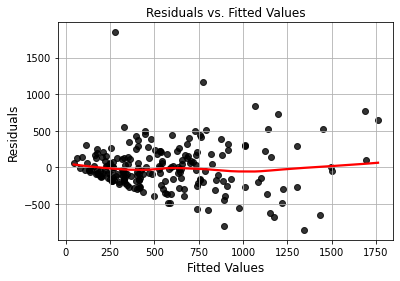

In [37]:
# Diagnostic plot for checking Heroscedasticity problem

sns.regplot(x = lm.fittedvalues, y = lm.resid, lowess = True,
               scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

> **result**: We see Heteroscedasticity problem in model (variance of residuals is not constant)

In [38]:
# Check Cook's distance
sum(lm.get_influence().summary_frame().cooks_d > 1)

0

> **result**: there is no Cook's Distance > 1

Check having Multicollinearity problem via VIF

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):  # X: features matrix
    vif = pd.DataFrame()
    vif['variables'] = X.columns  # column names
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

calc_vif(X_train.iloc[:, 1:]) # calculate VIF for each variable (if VIF > 10 then Multicollinearity problem is serious)

,variables,VIF
0,AtBat,184.789083
1,Hits,228.168969
2,HmRun,24.624973
3,Runs,94.783224
4,RBI,67.555583
5,Walks,22.239021
6,Years,19.479370
7,CAtBat,661.537532
8,CHits,1367.185526
9,CHmRun,94.537823


**Conclusion**:
* Severe violation of Regression Assumptions
* t-test results were not reliable for features selection
* Weak prediction power (bad model)

In [40]:
# Linear Regression model based on t-test results feature selection (just with significant variables)
lm = sm.OLS(y_train, X_train[['const', 'AtBat', 'Hits', 'Walks', 'PutOuts', 'Division_W']]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     20.05
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           3.00e-16
Time:                        00:36:54   Log-Likelihood:                -1546.2
No. Observations:                 210   AIC:                             3104.
Df Residuals:                     204   BIC:                             3124.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.4321     87.896      1.985      0.049       1.131     347.733
AtBat         -1.6859      0.702     -2.400      0.017      -3.071      -0.301
Hits           7.3574      2.169      3.391      0.001       3.080      11.635
Walks          6.4162      1.569      4.089      0.000       3.322       9.510
PutOuts        0.2851      0.104      2.751      0.006       0.081       0.489
Division_W  -158.5226     54.000     -2.936      0.004    -264.993     -52.052
==============================================================================
Omnibus:                       61.603   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.411
Skew:                           1.249   Prob(JB):                     3.64e-38
Kurtosis:                       6.670   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* R-squared decreased
* the Errors distribution is not Normal
* still have Multicollinearity problem
* weak model for Prediction

### Prediction on Test dataset
use Model 1 for prediction on Test dataset

In [41]:
test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
295,19,4,1,2,3,1,1,19,4,1,2,3,1,N,W,692,70,8,920.0,A
132,278,70,7,22,37,18,18,7186,2081,190,935,1088,643,A,W,0,0,0,325.0,A
137,343,103,6,48,36,40,15,4338,1193,70,581,421,325,A,E,211,56,13,430.0,A
268,549,149,7,73,47,42,1,549,149,7,73,47,42,N,W,255,450,17,140.0,N
239,309,72,0,33,31,26,5,354,82,0,41,32,26,N,E,117,269,12,130.0,N


In [42]:
# Create dummy variables for Categorical variables
dummies = pd.get_dummies(test[['League',
                               'Division',
                               'NewLeague']])

# Define the feature set X
X_ = test.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_test = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_test = sm.add_constant(X_test)  # adding a constant column

# Define response variable
y_test = test['Salary']

In [43]:
X_test.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
295,1.0,19,4,1,2,3,1,1,19,4,1,2,3,1,692,70,8,1,1,0
132,1.0,278,70,7,22,37,18,18,7186,2081,190,935,1088,643,0,0,0,0,1,0
137,1.0,343,103,6,48,36,40,15,4338,1193,70,581,421,325,211,56,13,0,0,0
268,1.0,549,149,7,73,47,42,1,549,149,7,73,47,42,255,450,17,1,1,1
239,1.0,309,72,0,33,31,26,5,354,82,0,41,32,26,117,269,12,1,0,1


In [44]:
y_test.head()

295    920.0
132    325.0
137    430.0
268    140.0
239    130.0
Name: Salary, dtype: float64

In [45]:
# use lm model for prediction
pred_lm = lm.predict(X_test[['const', 'AtBat', 'Hits', 'Walks', 'PutOuts', 'Division_W']])

Absolute Error

In [46]:
abs_err_lm = abs(y_test - pred_lm)

Absolute Error mean, median, sd, IQR, max, min

In [47]:
from scipy.stats import iqr

model_comp = pd.DataFrame({'Mean of AbsErrors': abs_err_lm.mean(),
                           'Median of AbsErrors': abs_err_lm.median(),
                           'SD of AbsErrors': abs_err_lm.std(),
                           'IQR of AbsErrors': iqr(abs_err_lm),
                           'Min of AbsErrors': abs_err_lm.min(),
                           'Max of AbsErrors': abs_err_lm.max()}, 
                          index = ['LM_t-test'])

model_comp  # Comparison different models based-on Absolute Error indexes in Test dataset

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257


Actual vs. Prediction

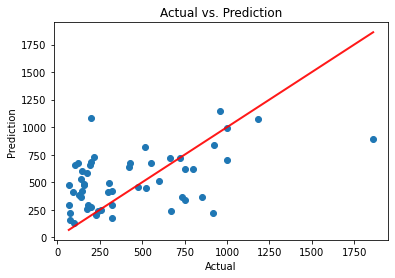

In [48]:
plt.scatter(x = y_test, y = pred_lm)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# Add 45' line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Box-Cox Transformation

In [49]:
from scipy.stats import boxcox

box_results = boxcox(y_train, alpha = 0.05)
box_results  # transformed y_train with optimum lambda and its 95% confidence interval

(array([ 8.68767642,  7.23164837, 10.57834815, 12.26939869, 10.83994871,
         6.62404411,  7.71258662,  8.68767642, 10.83994871,  8.96581785,
        11.22963399, 12.37152681,  9.42809521, 11.68471715, 11.22963399,
        10.2903865 , 11.07990572, 10.01452882,  6.24460125,  9.33424139,
        12.18523005,  8.49713804,  9.18694201,  9.85379764, 12.05455555,
         6.19217269,  8.29104472,  8.97678487,  9.12564319,  8.58783864,
        10.69755487, 12.26939869,  9.33424139, 13.38038527,  6.62404411,
        14.01171784, 10.66821468, 10.38965872, 11.15571849, 11.30175192,
         9.60648041,  7.84493411,  6.44250966,  7.42366699, 10.08065305,
         8.4167188 ,  7.92100039, 12.83795386,  5.73192967, 10.66821468,
         9.99213228, 11.57398419, 10.34045899, 10.91673547, 12.26939869,
         6.44250966, 11.44095555,  9.60648041, 13.35909851, 11.22963399,
         9.60648041, 13.4314587 ,  9.03092529,  9.7940383 , 10.92754387,
        10.79796189,  6.24460125, 10.44759156, 11.8

> optimum lambda (point estimate) is **0.13847** and confidence interval 95% is **(-0.01298, 0.28931)**

> **0** is in this confidence interval, so **0.13847** has not statistically significant difference from **0**, so we can consider **lambda = 0** and then **y' = log(y)**

In [50]:
# log transformation (changing variable to become Y variable Normal)
logy_train = np.log(y_train)
logy_train

98     5.703782
206    5.010635
54     6.514713
177    7.170120
27     6.620073
         ...   
183    4.828314
192    6.263398
256    5.991465
72     6.745236
263    6.606650
Name: Salary, Length: 210, dtype: float64

<Axes: xlabel='Salary', ylabel='Probability'>

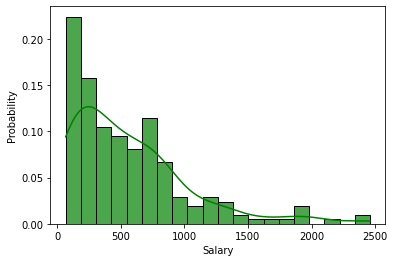

In [51]:
# Plot Histogram of 'Salary'
sns.histplot(y_train, stat = 'probability', kde = True, alpha = 0.7, color = 'green', bins = 20)

# skewed

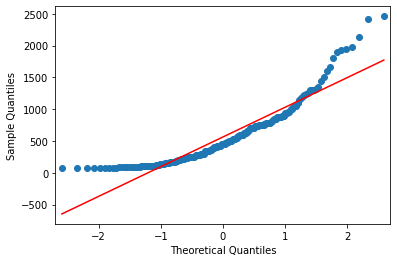

In [52]:
# QQ-plot
qqplot_lm_bc = sm.qqplot(y_train, line = 's')
plt.show()

<Axes: xlabel='Salary', ylabel='Probability'>

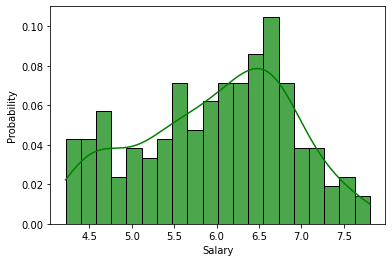

In [53]:
# Plot Histogram of 'log(Salary)'
sns.histplot(logy_train, stat = 'probability', kde = True, alpha = 0.7, color = 'green', bins = 20)

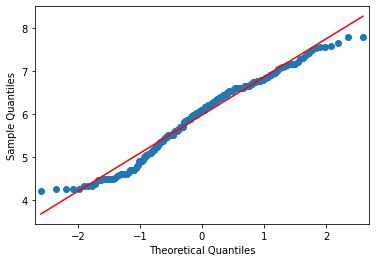

In [54]:
# QQ-plot
qqplot_lm_bc = sm.qqplot(logy_train, line = 's')
plt.show()

> from here, we will make our models on **log(Y)** to have Errors with constant variance and Normal distribution

> there is strong **Multicollinearity** between variables

## Model 2: Linear Regression Using the Best Subset Selection

In [55]:
X_train.head()  # 19 predictor variables

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
98,1.0,415,115,27,97,71,68,3,711,184,45,156,119,99,274,2,7,1,1,1
206,1.0,407,93,8,47,30,30,2,969,230,14,121,69,68,172,317,25,1,1,1
54,1.0,403,101,12,45,53,39,12,5150,1429,166,747,666,526,316,6,5,0,0,0
177,1.0,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,0,0,0
27,1.0,474,129,10,50,56,40,10,2331,604,61,246,327,166,732,83,13,1,1,1


In [56]:
# Define function to fit Linear Regression
def fit_lm(feature_set):
    reg_model = sm.OLS(logy_train, X_train[['const'] + list(feature_set)]).fit()
    return {'model': reg_model, 'RSquared': reg_model.rsquared}

In [57]:
# Get all possible 3-variable combinations of 19 variables
import itertools
list(itertools.combinations(X_train.columns[1:], 3))  # 969 different possible 3-variable regressions

[('AtBat', 'Hits', 'HmRun'),
 ('AtBat', 'Hits', 'Runs'),
 ('AtBat', 'Hits', 'RBI'),
 ('AtBat', 'Hits', 'Walks'),
 ('AtBat', 'Hits', 'Years'),
 ('AtBat', 'Hits', 'CAtBat'),
 ('AtBat', 'Hits', 'CHits'),
 ('AtBat', 'Hits', 'CHmRun'),
 ('AtBat', 'Hits', 'CRuns'),
 ('AtBat', 'Hits', 'CRBI'),
 ('AtBat', 'Hits', 'CWalks'),
 ('AtBat', 'Hits', 'PutOuts'),
 ('AtBat', 'Hits', 'Assists'),
 ('AtBat', 'Hits', 'Errors'),
 ('AtBat', 'Hits', 'League_N'),
 ('AtBat', 'Hits', 'Division_W'),
 ('AtBat', 'Hits', 'NewLeague_N'),
 ('AtBat', 'HmRun', 'Runs'),
 ('AtBat', 'HmRun', 'RBI'),
 ('AtBat', 'HmRun', 'Walks'),
 ('AtBat', 'HmRun', 'Years'),
 ('AtBat', 'HmRun', 'CAtBat'),
 ('AtBat', 'HmRun', 'CHits'),
 ('AtBat', 'HmRun', 'CHmRun'),
 ('AtBat', 'HmRun', 'CRuns'),
 ('AtBat', 'HmRun', 'CRBI'),
 ('AtBat', 'HmRun', 'CWalks'),
 ('AtBat', 'HmRun', 'PutOuts'),
 ('AtBat', 'HmRun', 'Assists'),
 ('AtBat', 'HmRun', 'Errors'),
 ('AtBat', 'HmRun', 'League_N'),
 ('AtBat', 'HmRun', 'Division_W'),
 ('AtBat', 'HmRun', 'NewLea

Best Subset Selection

In [58]:
def bestsubset_func(k):
    res = []
    for features in itertools.combinations(X_train.columns[1:], k):
        res.append(fit_lm(features))  # fit regression and save results for each state
        
    models = pd.DataFrame(res)
    best_model = models.iloc[models['RSquared'].argmax()]  # extract the best model from dataframe
    return best_model  # return the best model for k-variable regression

In [59]:
import time

models_bestsub = pd.DataFrame(columns = ['RSquared', 'model'])

start_time = time.time()
for i in range(1, len(X_train.columns[1:]) + 1):
    models_bestsub.loc[i] = bestsubset_func(i)  # save the best k-variable regression model
end_time = time.time()

print('The Processing time is:', end_time - start_time, 'seconds')

The Processing time is: 327.01867604255676 seconds


In [60]:
models_bestsub  # 19 different Regression models

,RSquared,model
1,0.425432,<statsmodels.regression.linear_model.Regressio...
2,0.512932,<statsmodels.regression.linear_model.Regressio...
3,0.525508,<statsmodels.regression.linear_model.Regressio...
4,0.534908,<statsmodels.regression.linear_model.Regressio...
5,0.54277,<statsmodels.regression.linear_model.Regressio...
6,0.547237,<statsmodels.regression.linear_model.Regressio...
7,0.551506,<statsmodels.regression.linear_model.Regressio...
8,0.557208,<statsmodels.regression.linear_model.Regressio...
9,0.56114,<statsmodels.regression.linear_model.Regressio...
10,0.563411,<statsmodels.regression.linear_model.Regressio...


In [61]:
print(models_bestsub.loc[4, 'model'].summary())  # 4-variables regression model

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     58.94
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           4.67e-33
Time:                        00:42:22   Log-Likelihood:                -192.52
No. Observations:                 210   AIC:                             395.0
Df Residuals:                     205   BIC:                             411.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6128      0.159     29.014      0.0

Comparison models based-on Adj. R-squared

In [62]:
# Extract Adj. R-squared of all 19 models
models_bestsub_adjrs = models_bestsub.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bestsub_adjrs

1     0.422670
2     0.508226
3     0.518598
4     0.525833
5     0.531564
6     0.533855
7     0.535964
8     0.539585
9     0.541391
10    0.541472
11    0.541688
12    0.540516
13    0.539044
14    0.537243
15    0.535404
16    0.533531
17    0.531110
18    0.528737
19    0.526265
dtype: float64

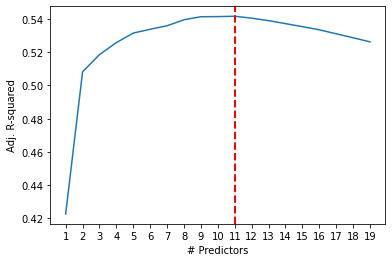

In [63]:
# Adj. R-squared plot
plt.plot(models_bestsub_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj. R-squared')
plt.axvline(models_bestsub_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

> best model based-on **Adj. R-squared**: 11-variables Linear Regression

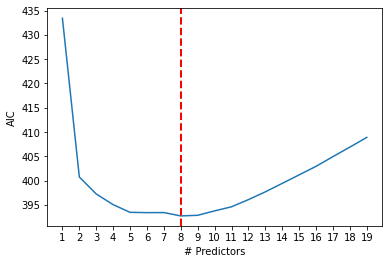

In [64]:
# AIC plot
models_bestsub_aic = models_bestsub.apply(lambda row: row[1].aic, axis = 1)  # Extract AIC of all 19 models
plt.plot(models_bestsub_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bestsub_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

> best model based-on **AIC**: 8-variables Linear Regression

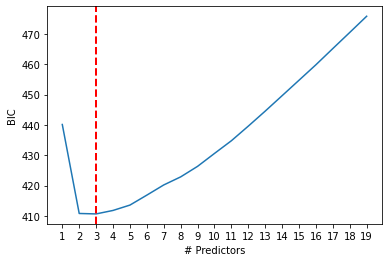

In [65]:
# BIC plot
models_bestsub_bic = models_bestsub.apply(lambda row: row[1].bic, axis = 1)  # Extract BIC of all 19 models
plt.plot(models_bestsub_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bestsub_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

> best model based-on **BIC**: 3-variables Linear Regression

In [66]:
# Linear Regression model with 11 variables
models_bestsub.loc[11, 'model'].params  # extract model parameters

const         4.599892
AtBat        -0.002436
Hits          0.010633
HmRun         0.009030
Walks         0.008183
Years         0.057739
CRuns         0.001434
CWalks       -0.001006
PutOuts       0.000257
Assists       0.000365
League_N      0.125903
Division_W   -0.190390
dtype: float64

In [67]:
models_bestsub.loc[11, 'model'].model.exog_names  # name of features

['const',
 'AtBat',
 'Hits',
 'HmRun',
 'Walks',
 'Years',
 'CRuns',
 'CWalks',
 'PutOuts',
 'Assists',
 'League_N',
 'Division_W']

### Prediction on Test dataset
use Model 2 for prediction on Test dataset

In [68]:
# Extract appropriate columns from Test dataset which are same to variables used in 11-variables Regression model
X_test[models_bestsub.loc[11, 'model'].model.exog_names].head()

,const,AtBat,Hits,HmRun,Walks,Years,CRuns,CWalks,PutOuts,Assists,League_N,Division_W
295,1.0,19,4,1,1,1,2,1,692,70,1,1
132,1.0,278,70,7,18,18,935,643,0,0,0,1
137,1.0,343,103,6,40,15,581,325,211,56,0,0
268,1.0,549,149,7,42,1,73,42,255,450,1,1
239,1.0,309,72,0,26,5,41,26,117,269,1,0


In [69]:
pred_bestsub = models_bestsub.loc[11, 'model'].predict(X_test[models_bestsub.loc[11, 'model'].model.exog_names])
pred_bestsub.head()  # prediction of log(Salary)

295    4.811669
132    6.420305
137    6.687956
268    5.539181
239    5.400993
dtype: float64

In [70]:
pred_bestsub = np.exp(pred_bestsub)
pred_bestsub.head()  # prediction of Salary

295    122.936656
132    614.190643
137    802.680216
268    254.469448
239    221.626363
dtype: float64

In [71]:
y_test.head()  # real value of Salary

295    920.0
132    325.0
137    430.0
268    140.0
239    130.0
Name: Salary, dtype: float64

Absolute Error

In [72]:
abs_err_bestsub = abs(y_test - pred_bestsub)

Absolute Error mean, median, sd, IQR, max, min

In [73]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_bestsub.mean(),
                                             'Median of AbsErrors': abs_err_bestsub.median(),
                                             'SD of AbsErrors': abs_err_bestsub.std(),
                                             'IQR of AbsErrors': iqr(abs_err_bestsub),
                                             'Min of AbsErrors': abs_err_bestsub.min(),
                                             'Max of AbsErrors': abs_err_bestsub.max()},
                                            index = ['BestSubset']),
                              ignore_index = False)
model_comp

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\1117552285.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_bestsub.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276


Actual vs. Prediction

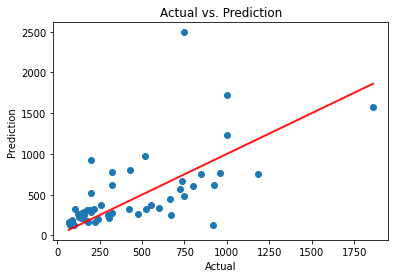

In [74]:
plt.scatter(x = y_test, y = pred_bestsub)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# add 45' line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 3: Forward and Backward Stepwise Selection Regression

In [75]:
def forward_func(features):
    res = []
    
    remaining_features = [_ for _ in X_train.columns[1:] if _ not in features]
    
    for f in remaining_features:
        res.append(fit_lm(features + [f]))
    
    models = pd.DataFrame(res)
    
    best_model = models.iloc[models['RSquared'].argmax()]  # choose the model with the Highest R-Squared
    
    return best_model

In [76]:
# Forward Stepwise Selection
import time

models_fw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = []
for i in range(1, len(X_train.columns[1:]) + 1):
    models_fw.loc[i] = forward_func(features)
    features = models_fw.loc[i, 'model'].model.exog_names[1:]
end_time = time.time()
print('The Processing time is:', end_time - start_time, 'seconds')

The Processing time is: 0.12823200225830078 seconds


In [77]:
models_fw  # 19 different Regression models

,RSquared,model
1,0.425432,<statsmodels.regression.linear_model.Regressio...
2,0.512932,<statsmodels.regression.linear_model.Regressio...
3,0.525508,<statsmodels.regression.linear_model.Regressio...
4,0.534138,<statsmodels.regression.linear_model.Regressio...
5,0.54277,<statsmodels.regression.linear_model.Regressio...
6,0.547122,<statsmodels.regression.linear_model.Regressio...
7,0.550685,<statsmodels.regression.linear_model.Regressio...
8,0.554685,<statsmodels.regression.linear_model.Regressio...
9,0.557618,<statsmodels.regression.linear_model.Regressio...
10,0.560101,<statsmodels.regression.linear_model.Regressio...


In [78]:
print(models_fw.loc[4, 'model'].summary())  # 4-variable model

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     58.76
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           5.53e-33
Time:                        00:42:22   Log-Likelihood:                -192.69
No. Observations:                 210   AIC:                             395.4
Df Residuals:                     205   BIC:                             412.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7982      0.126     37.978      0.0

Adj. R-squared

In [79]:
models_fw_adjrs = models_fw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_fw_adjrs

1     0.422670
2     0.508226
3     0.518598
4     0.525048
5     0.531564
6     0.533737
7     0.535115
8     0.536961
9     0.537711
10    0.537996
11    0.539208
12    0.539362
13    0.538233
14    0.536697
15    0.534933
16    0.533036
17    0.531110
18    0.528737
19    0.526265
dtype: float64

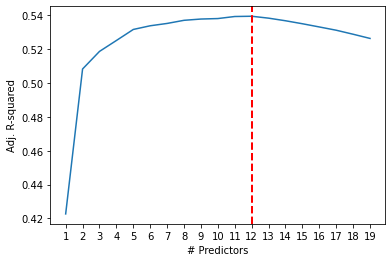

In [80]:
# Adj. R-squared plot
plt.plot(models_fw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj. R-squared')
plt.axvline(models_fw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

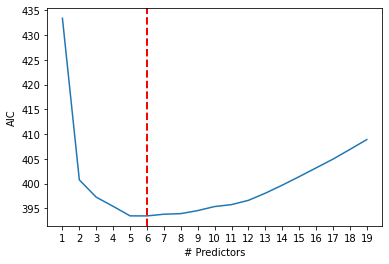

In [81]:
# AIC plot
models_fw_aic = models_fw.apply(lambda row: row[1].aic, axis = 1)
plt.plot(models_fw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_fw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

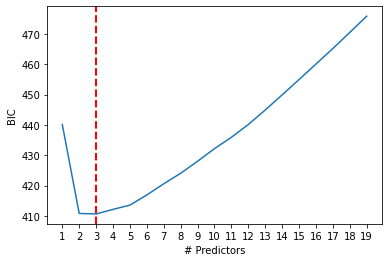

In [82]:
# BIC plot
models_fw_bic = models_fw.apply(lambda row: row[1].bic, axis = 1)
plt.plot(models_fw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_fw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

Linear Regression model with 12 variables

In [83]:
models_fw.loc[12, 'model'].params

const         4.600357
CHits         0.000005
Hits          0.010624
Division_W   -0.190520
Walks         0.008189
Years         0.057619
League_N      0.125747
AtBat        -0.002434
PutOuts       0.000256
HmRun         0.009038
CWalks       -0.001005
CRuns         0.001425
Assists       0.000365
dtype: float64

In [84]:
def backward_func(features):
    res = []
    
    for features in itertools.combinations(features, len(features) - 1):
        res.append(fit_lm(features))
        
    models = pd.DataFrame(res)
    
    best_model = models.iloc[models['RSquared'].argmax()]
    
    return best_model

In [85]:
# Backward Stepwise Selection
models_bw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = X_train.columns
while(len(features) > 1):
    models_bw.loc[len(features) - 1] = backward_func(features)
    features = models_bw.loc[len(features) - 1]['model'].model.exog_names[1:]
end_time = time.time()
print('The Processing time is:', end_time - start_time, 'seconds')

The Processing time is: 0.14492416381835938 seconds


In [86]:
models_bw  # 19 different Regression models

,RSquared,model
19,0.569332,<statsmodels.regression.linear_model.Regressio...
18,0.569325,<statsmodels.regression.linear_model.Regressio...
17,0.569249,<statsmodels.regression.linear_model.Regressio...
16,0.569241,<statsmodels.regression.linear_model.Regressio...
15,0.568749,<statsmodels.regression.linear_model.Regressio...
14,0.568241,<statsmodels.regression.linear_model.Regressio...
13,0.567716,<statsmodels.regression.linear_model.Regressio...
12,0.566898,<statsmodels.regression.linear_model.Regressio...
11,0.56581,<statsmodels.regression.linear_model.Regressio...
10,0.563411,<statsmodels.regression.linear_model.Regressio...


In [87]:
print(models_bw.loc[4, 'model'].summary())  # 4-variable model

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     58.94
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           4.67e-33
Time:                        00:42:23   Log-Likelihood:                -192.52
No. Observations:                 210   AIC:                             395.0
Df Residuals:                     205   BIC:                             411.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6128      0.159     29.014      0.0

Adj. R-squared

In [88]:
models_bw_adjrs = models_bw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bw_adjrs = models_bw_adjrs.sort_index()
models_bw_adjrs

1     0.422629
2     0.507615
3     0.517365
4     0.525833
5     0.530406
6     0.532425
7     0.535709
8     0.539585
9     0.541391
10    0.541472
11    0.541688
12    0.540516
13    0.539044
14    0.537243
15    0.535404
16    0.533531
17    0.531110
18    0.528737
19    0.526265
dtype: float64

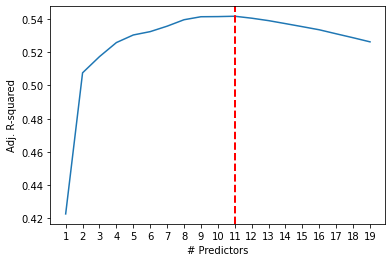

In [89]:
# Adj. R-squared plot
plt.plot(models_bw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj. R-squared')
plt.axvline(models_bw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

> the best model based-on **Adj. R-squared** is 11-variable model

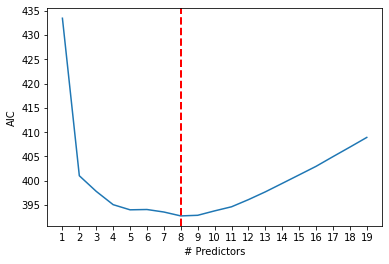

In [90]:
# AIC plot
models_bw_aic = models_bw.apply(lambda row: row[1].aic, axis = 1)
models_bw_aic = models_bw_aic.sort_index()
plt.plot(models_bw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

> the best model based-on **AIC** is 8-variable model

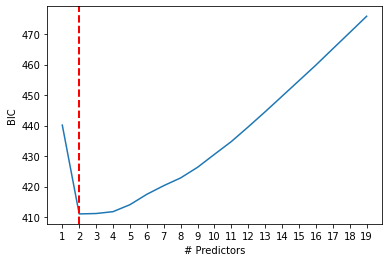

In [91]:
# BIC plot
models_bw_bic = models_bw.apply(lambda row: row[1].bic, axis = 1)
models_bw_bic = models_bw_bic.sort_index()
plt.plot(models_bw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

> the best model based-on **BIC** is 2-variable model

### Prediction on Test dataset
use Model 3 for prediction on Test dataset

In [92]:
# Forward Stepwise Selection model with 12 variables (based-on Adj. R-squared)
models_fw.loc[12, 'model'].params

const         4.600357
CHits         0.000005
Hits          0.010624
Division_W   -0.190520
Walks         0.008189
Years         0.057619
League_N      0.125747
AtBat        -0.002434
PutOuts       0.000256
HmRun         0.009038
CWalks       -0.001005
CRuns         0.001425
Assists       0.000365
dtype: float64

In [93]:
pred_fw = models_fw.loc[12, 'model'].predict(X_test[models_fw.loc[12, 'model'].model.exog_names])  # prediction of log(Salary)
pred_fw = np.exp(pred_fw)  # prediction of Salary
pred_fw.head()

295    122.907000
132    614.793307
137    802.378147
268    254.415807
239    221.544790
dtype: float64

Absolute Error

In [94]:
abs_err_fw = abs(y_test - pred_fw)

Absolute Error mean, median, sd, IQR, max, min

In [95]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_fw.mean(),
                                             'Median of AbsErrors': abs_err_fw.median(),
                                             'SD of AbsErrors': abs_err_fw.std(),
                                             'IQR of AbsErrors': iqr(abs_err_fw),
                                             'Min of AbsErrors': abs_err_fw.min(),
                                             'Max of AbsErrors': abs_err_fw.max()},
                                           index = ['Forward Stepwise']),
                              ignore_index = False)
model_comp

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\4062776228.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_fw.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787


Actual vs. Prediction

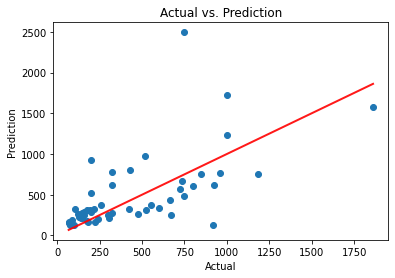

In [96]:
plt.scatter(x = y_test, y = pred_fw)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# add 45' line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 4: Stepwise Regression Using k-fold Cross-Validation approach
use k-fold Cross-Validation instead of AIC, BIC and Adj. R-squared (statistical indexes) to choose the best model

In [97]:
k = 10  # create 10 folds
np.random.seed(123)
folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])
folds

array([ 3,  3,  7,  2,  4, 10,  7,  2,  1,  2, 10,  1,  1, 10,  4,  5,  1,
        1,  5,  2,  8,  4,  3,  5,  8,  3,  5,  9,  1,  8, 10,  4,  5,  7,
        2,  6,  7,  3,  2,  9,  4,  6,  1,  3,  7,  3,  5,  5,  7,  4,  1,
        7,  5,  8,  7,  8,  2,  6,  8, 10,  3,  5,  9,  2,  3,  2,  2,  4,
        6, 10,  1,  9,  2,  7,  4,  4,  6, 10,  8, 10,  3,  4,  4,  4,  9,
        7, 10,  8,  7,  4, 10,  7,  7,  7,  2,  4,  5,  4,  2,  1,  6,  9,
        7,  9, 10,  2,  1,  4,  2,  4,  5,  8,  7,  2,  5,  4,  4,  8,  7,
        9,  7,  5,  5,  8,  1,  1, 10,  9,  9,  5,  9,  7,  2,  7,  9,  8,
       10,  2,  8,  2,  8, 10,  9,  8,  2,  4,  2,  9,  8,  6,  2,  3,  6,
        3,  3, 10,  4,  3,  7,  8, 10,  2,  4,  9,  4,  8, 10, 10,  4,  4,
        6,  7,  1,  9,  8,  8,  5,  5,  6,  1,  9, 10,  3,  6,  2,  6, 10,
        3,  5,  4,  1,  4,  8,  8,  3,  6,  2,  8,  6, 10,  2,  3,  9,  6,
        1, 10,  4,  4,  4,  2])

In [98]:
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 20))
cv_errors

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# Forward Stepwise Selection results
models_fw

,RSquared,model
1,0.425432,<statsmodels.regression.linear_model.Regressio...
2,0.512932,<statsmodels.regression.linear_model.Regressio...
3,0.525508,<statsmodels.regression.linear_model.Regressio...
4,0.534138,<statsmodels.regression.linear_model.Regressio...
5,0.54277,<statsmodels.regression.linear_model.Regressio...
6,0.547122,<statsmodels.regression.linear_model.Regressio...
7,0.550685,<statsmodels.regression.linear_model.Regressio...
8,0.554685,<statsmodels.regression.linear_model.Regressio...
9,0.557618,<statsmodels.regression.linear_model.Regressio...
10,0.560101,<statsmodels.regression.linear_model.Regressio...


In [100]:
# Forward Stepwise Selection using k-fold Cross-Validation
for i in range(1, models_fw.shape[0] + 1):
    for j in range(1, k + 1):
        reg_model = sm.OLS(logy_train[folds != j], X_train.loc[folds != j, models_fw.loc[i, 'model'].model.exog_names]).fit()
        pred = reg_model.predict(X_train.loc[folds == j, models_fw.loc[i, 'model'].model.exog_names])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()
        
cv_errors

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0.385778,0.339508,0.338599,0.334091,0.341269,0.320914,0.321674,0.344923,0.340978,0.338953,0.341332,0.340178,0.353701,0.349647,0.347048,0.350344,0.366441,0.366923,0.366921
2,0.618394,0.552744,0.51593,0.512918,0.507632,0.523144,0.530161,0.521972,0.51781,0.510128,0.528101,0.540469,0.545626,0.579453,0.609889,0.625634,0.623402,0.633717,0.633984
3,0.359903,0.308089,0.284955,0.262682,0.25328,0.249789,0.232925,0.268011,0.267101,0.323239,0.308574,0.310015,0.308437,0.30411,0.324179,0.321527,0.342124,0.341638,0.343261
4,0.535129,0.334172,0.34674,0.334508,0.311085,0.297051,0.316048,0.303853,0.301524,0.297348,0.287929,0.282067,0.28255,0.281511,0.29931,0.307498,0.313555,0.321293,0.331839
5,0.454441,0.234904,0.29582,0.293279,0.292527,0.32454,0.306409,0.287988,0.277459,0.279936,0.270617,0.261819,0.268101,0.267356,0.266207,0.263684,0.261796,0.261351,0.263266
6,0.276342,0.217736,0.199292,0.191739,0.168811,0.188772,0.21327,0.231859,0.229362,0.240496,0.241633,0.253171,0.256214,0.250754,0.259643,0.261615,0.26016,0.260017,0.259983
7,0.324075,0.344247,0.3346,0.310509,0.308438,0.300019,0.294508,0.278512,0.302981,0.300067,0.292918,0.285696,0.282054,0.279461,0.278032,0.27609,0.274146,0.27583,0.282746
8,0.645333,0.831073,0.793251,0.800047,0.820727,0.815866,0.803494,0.802336,0.801409,0.799248,0.786075,0.77739,0.775325,0.797919,0.81929,0.826279,0.830948,0.834031,0.838582
9,0.42929,0.271813,0.262909,0.252491,0.23023,0.245847,0.236647,0.258335,0.269157,0.274181,0.317065,0.318855,0.314986,0.315036,0.321553,0.319417,0.318438,0.321822,0.323041
10,0.39302,0.395168,0.391195,0.412247,0.40806,0.394399,0.415009,0.407971,0.427193,0.441239,0.45369,0.462029,0.457915,0.455285,0.453532,0.476819,0.478343,0.478605,0.485421


In [101]:
mean_cv_errors = cv_errors.mean(axis = 0)
mean_cv_errors

1     0.442171
2     0.382945
3     0.376329
4     0.370451
5     0.364206
6     0.366034
7     0.367014
8     0.370576
9     0.373497
10    0.380483
11    0.382793
12    0.383169
13    0.384491
14    0.388053
15    0.397868
16    0.402891
17    0.406935
18    0.409523
19    0.412904
dtype: float64

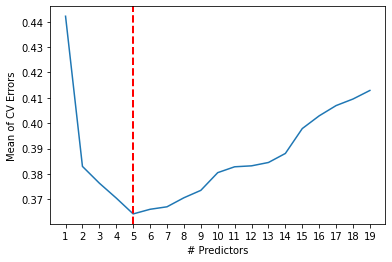

In [102]:
# Mean of CV Errors plot
plt.plot(mean_cv_errors)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Mean of CV Errors')
plt.axvline(mean_cv_errors.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

### Prediction on Test dataset
use Model 4 for prediction on Test dataset

In [103]:
# Forward Stepwise Selection model with 5 variables
models_fw.loc[5, 'model'].params

const         4.575593
CHits         0.000466
Hits          0.005712
Division_W   -0.199733
Walks         0.005095
Years         0.044819
dtype: float64

In [104]:
pred_fw_cv = models_fw.loc[5, 'model'].predict(X_test[models_fw.loc[5, 'model'].model.exog_names])
pred_fw_cv = np.exp(pred_fw_cv)
pred_fw_cv.head()

295     85.668593
132    767.980860
137    732.069863
268    258.573612
239    217.376163
dtype: float64

Absolute Error

In [105]:
abs_err_fw_cv = abs(y_test - pred_fw_cv)

Absolute Error mean, median, sd, IQR, max, min

In [106]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_fw_cv.mean(),
                                             'Median of AbsErrors': abs_err_fw_cv.median(),
                                             'SD of AbsErrors': abs_err_fw_cv.std(),
                                             'IQR of AbsErrors': iqr(abs_err_fw_cv),
                                             'Min of AbsErrors': abs_err_fw_cv.min(),
                                             'Max of AbsErrors': abs_err_fw_cv.max()},
                                           index = ['Forward Stepwise CV']),
                              ignore_index = False)
model_comp

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\3943348365.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_fw_cv.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170


## Model 5: Ridge Regression

In [107]:
lambda_grid = 10 ** np.linspace(5, -2, 100)
lambda_grid

array([1.00000000e+05, 8.49753436e+04, 7.22080902e+04, 6.13590727e+04,
       5.21400829e+04, 4.43062146e+04, 3.76493581e+04, 3.19926714e+04,
       2.71858824e+04, 2.31012970e+04, 1.96304065e+04, 1.66810054e+04,
       1.41747416e+04, 1.20450354e+04, 1.02353102e+04, 8.69749003e+03,
       7.39072203e+03, 6.28029144e+03, 5.33669923e+03, 4.53487851e+03,
       3.85352859e+03, 3.27454916e+03, 2.78255940e+03, 2.36448941e+03,
       2.00923300e+03, 1.70735265e+03, 1.45082878e+03, 1.23284674e+03,
       1.04761575e+03, 8.90215085e+02, 7.56463328e+02, 6.42807312e+02,
       5.46227722e+02, 4.64158883e+02, 3.94420606e+02, 3.35160265e+02,
       2.84803587e+02, 2.42012826e+02, 2.05651231e+02, 1.74752840e+02,
       1.48496826e+02, 1.26185688e+02, 1.07226722e+02, 9.11162756e+01,
       7.74263683e+01, 6.57933225e+01, 5.59081018e+01, 4.75081016e+01,
       4.03701726e+01, 3.43046929e+01, 2.91505306e+01, 2.47707636e+01,
       2.10490414e+01, 1.78864953e+01, 1.51991108e+01, 1.29154967e+01,
      

In [108]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
ridgereg = Ridge()
scaler = StandardScaler()
scaler.fit(X_train)

models = pd.DataFrame(index = lambda_grid, columns = X_train.columns)
coefs = []
for i in lambda_grid:
    ridgereg.set_params(alpha = i)
    ridgereg.fit(scaler.transform(X_train), logy_train)
    models.loc[i] = ridgereg.coef_

models.shape

(100, 20)

In [109]:
models.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
100000.000000,0.0,0.000812,0.000862,0.000682,0.000818,0.000856,0.00079,0.000989,0.001172,0.001197,0.00098,0.001197,0.001128,0.00104,0.000408,0.000185,0.000048,0.000003,-0.00034,-0.000021
84975.343591,0.0,0.000953,0.001012,0.000801,0.00096,0.001004,0.000927,0.00116,0.001375,0.001405,0.001149,0.001405,0.001324,0.001221,0.000479,0.000217,0.000056,0.000004,-0.000399,-0.000025
72208.090184,0.0,0.001118,0.001188,0.000939,0.001127,0.001177,0.001088,0.001361,0.001613,0.001649,0.001348,0.001648,0.001553,0.001432,0.000562,0.000255,0.000066,0.000005,-0.000469,-0.000029
61359.072734,0.0,0.001311,0.001393,0.0011,0.001321,0.00138,0.001275,0.001596,0.001891,0.001933,0.001579,0.001932,0.00182,0.001679,0.00066,0.000299,0.000077,0.000007,-0.000551,-0.000033
52140.082880,0.0,0.001536,0.001633,0.001288,0.001548,0.001617,0.001494,0.001871,0.002216,0.002265,0.001849,0.002264,0.002132,0.001966,0.000773,0.000352,0.00009,0.00001,-0.000647,-0.000037


In [110]:
models.tail()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0.019179,0.0,-0.339759,0.581853,0.167483,-0.11228,-0.094503,0.214879,0.246683,0.115675,-0.140176,-0.06921,0.545486,0.018783,-0.289288,0.071992,0.060334,-0.030446,0.095114,-0.100955,-0.040093
0.016298,0.0,-0.340264,0.582756,0.167732,-0.112753,-0.094767,0.215074,0.246684,0.117667,-0.144415,-0.070174,0.547562,0.020392,-0.289933,0.072007,0.060307,-0.030421,0.095042,-0.10097,-0.04002
0.013849,0.0,-0.3407,0.583536,0.167947,-0.113161,-0.094995,0.215242,0.246684,0.119403,-0.148099,-0.071012,0.549359,0.021793,-0.290492,0.07202,0.060284,-0.0304,0.094979,-0.100982,-0.039956
0.011768,0.0,-0.341076,0.584208,0.168133,-0.113512,-0.095192,0.215387,0.246684,0.12091,-0.15129,-0.071739,0.550911,0.023008,-0.290974,0.072031,0.060263,-0.030382,0.094924,-0.100993,-0.039902
0.010000,0.0,-0.341398,0.584786,0.168292,-0.113814,-0.095362,0.215512,0.246682,0.122214,-0.154046,-0.072367,0.552247,0.024058,-0.291389,0.072041,0.060245,-0.030366,0.094877,-0.101002,-0.039854


Plot Results

Text(0, 0.5, 'weights')

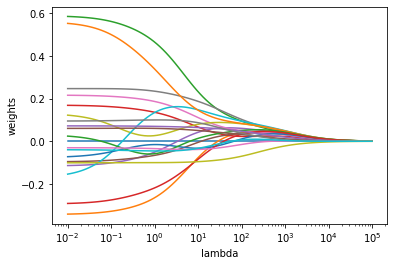

In [111]:
plot_ridge = plt.gca() 
plot_ridge.plot(models)
plot_ridge.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')

k-fold Cross-Validation to choose the Best Model

In [112]:
ridgecv = RidgeCV(alphas = lambda_grid, cv = 10)
ridgecv.fit(scaler.transform(X_train), logy_train)
ridgecv.alpha_

65.79332246575683

### Prediction on Test dataset
use Model 5 for prediction on Test dataset

In [113]:
# the Best Model Coefs
ridgecv.coef_

array([ 0.        ,  0.03300289,  0.10890213,  0.02465901,  0.06240987,
        0.03347578,  0.05531449,  0.11773786,  0.08531076,  0.10251185,
       -0.00030422,  0.089136  ,  0.04675161,  0.02081829,  0.05180113,
        0.03508703, -0.02100419,  0.04621937, -0.07758964,  0.00185265])

In [114]:
ridgereg = Ridge(alpha = ridgecv.alpha_)
ridgereg.fit(scaler.transform(X_train), logy_train)
pred_ridge = ridgereg.predict(scaler.transform(X_test))
pred_ridge = np.exp(pred_ridge)
pred_ridge

array([ 120.10804881,  668.35413537,  547.6570666 ,  287.03957285,
        225.47064529,  502.50063628,  696.10565077,  358.47904313,
        338.69932194, 2668.34351992,  328.93055494,  730.4665681 ,
        335.44154671,  992.15848362, 1138.183042  ,  198.45639136,
        223.21669447,  461.74626605,  163.35258097,  333.35704106,
        228.2628837 ,  319.85132342,  157.73704391,  295.9875488 ,
       1618.80267081,  327.28855401,  221.04485677,  698.48712299,
        289.97905197,  407.32562042,  363.06216491,  167.18026065,
        233.8168854 ,  178.70223896,  189.31889773,  283.61938579,
        624.61942505,  259.91336593,  172.26642016,  903.22625962,
        455.81858004,  410.69273837,  612.8530673 ,  540.06732805,
        282.70484073,  187.27602055,  134.52494092,  278.84468473,
        345.07779512,  856.60469096,  239.97089566, 1228.09406146,
        553.35452479])

Absolute Error

In [115]:
abs_err_ridge = abs(y_test - pred_ridge)

Absolute Error mean, median, sd, IQR, max, min

In [116]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_ridge.mean(),
                                             'Median of AbsErrors': abs_err_ridge.median(),
                                             'SD of AbsErrors': abs_err_ridge.std(),
                                             'IQR of AbsErrors': iqr(abs_err_ridge),
                                             'Min of AbsErrors': abs_err_ridge.min(),
                                             'Max of AbsErrors': abs_err_ridge.max()},
                                           index = ['Ridge Reg']),
                              ignore_index = False)
model_comp

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\916874010.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_ridge.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.655840,151.512877,295.713462,134.062787,7.276021,1918.343520


Actual vs. Prediction

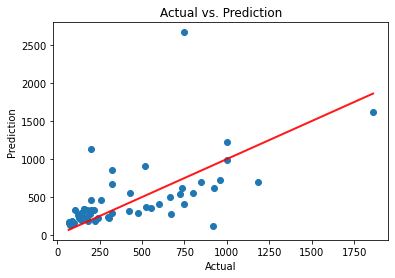

In [117]:
plt.scatter(x = y_test, y = pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# add 45' line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 6: LASSO Regression

In [118]:
lambda_grid = 10 ** np.linspace(1, -3, 100)

In [119]:
from sklearn.linear_model import Lasso, LassoCV
lassoreg = Lasso()

models = pd.DataFrame(index = lambda_grid, columns = X_train.columns)
coefs = []
for i in lambda_grid:
    lassoreg.set_params(alpha = i)
    lassoreg.fit(scaler.transform(X_train), logy_train)
    models.loc[i] = lassoreg.coef_

models.shape

(100, 20)

In [120]:
models.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
9.111628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
8.302176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
7.564633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
6.892612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0


In [121]:
models.tail()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0.001451,0.0,-0.270805,0.474969,0.125017,-0.048916,-0.056761,0.176853,0.244951,0.0,0.046503,-0.039062,0.406054,-0.0,-0.214585,0.06857,0.056747,-0.028514,0.0889,-0.097239,-0.032661
0.001322,0.0,-0.275554,0.482955,0.128767,-0.054428,-0.059929,0.1799,0.245857,0.0,0.040319,-0.040858,0.417456,-0.0,-0.220008,0.068818,0.057244,-0.028699,0.08959,-0.097513,-0.03341
0.001205,0.0,-0.279892,0.490231,0.132184,-0.059441,-0.062819,0.182678,0.246677,0.0,0.034717,-0.042487,0.427813,-0.0,-0.224953,0.069044,0.057697,-0.028867,0.090217,-0.097764,-0.034094
0.001097,0.0,-0.28387,0.496888,0.135302,-0.064004,-0.065455,0.185209,0.247438,0.0,0.029618,-0.04397,0.43722,-0.0,-0.229448,0.069248,0.058111,-0.029019,0.090787,-0.097991,-0.034714
0.001000,0.0,-0.287517,0.502982,0.138148,-0.068159,-0.067856,0.187514,0.248153,0.0,0.024976,-0.045324,0.445751,-0.0,-0.233525,0.069434,0.058487,-0.029155,0.091304,-0.098198,-0.035276


Plot Results

Text(0, 0.5, 'weights')

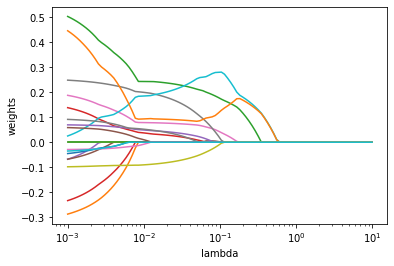

In [122]:
plot_lasso = plt.gca()
plot_lasso.plot(models)
plot_lasso.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')

k-fold Cross-Validation to choose the Best Model

In [123]:
lassocv = LassoCV(alphas = lambda_grid, cv = 10)
lassocv.fit(scaler.transform(X_train), logy_train)
lassocv.alpha_

0.021544346900318822

### Prediction on Test dataset
use Model 6 for prediction on Test dataset

In [124]:
# the Best Model Coefs
lassocv.coef_

array([ 0.        ,  0.        ,  0.23572083,  0.02729093,  0.        ,
        0.        ,  0.07584621,  0.17569587,  0.        ,  0.20370593,
        0.        ,  0.09124893,  0.        ,  0.        ,  0.04098142,
        0.        , -0.        ,  0.03741903, -0.08021472,  0.        ])

In [125]:
lassoreg = Lasso(alpha = lassocv.alpha_)
lassoreg.fit(scaler.transform(X_train), logy_train)
pred_lasso = lassoreg.predict(scaler.transform(X_test))
pred_lasso = np.exp(pred_lasso)
pred_lasso

array([ 108.77022651,  708.26535661,  647.88899613,  270.02454124,
        218.53963976,  501.38167547,  660.72855131,  367.8486696 ,
        322.1002005 , 2930.33402365,  318.55475019,  716.73652637,
        316.14964874, 1128.64706086, 1066.08826026,  193.78349805,
        228.25161222,  443.43013907,  160.82059607,  312.8577035 ,
        223.19801158,  304.8828753 ,  151.95997636,  294.06475539,
       1528.27337984,  336.25966678,  213.40018506,  772.05608403,
        287.04627355,  403.73322815,  332.72414612,  156.98060269,
        230.04991361,  170.7728045 ,  181.75466664,  263.3427987 ,
        628.5504488 ,  246.76063178,  166.7661925 ,  861.81504521,
        437.69440085,  391.96201706,  659.39893415,  580.37865787,
        278.83372485,  176.18051037,  132.9125202 ,  261.57853199,
        333.04791165,  844.63246985,  230.35102794, 1382.69758704,
        514.77486552])

Absolute Error

In [126]:
abs_err_lasso = abs(y_test - pred_lasso)

Absolute Error mean, median, sd, IQR, max, min

In [127]:
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_lasso.mean(),
                                             'Median of AbsErrors': abs_err_lasso.median(),
                                             'SD of AbsErrors': abs_err_lasso.std(),
                                             'IQR of AbsErrors': iqr(abs_err_lasso),
                                             'Min of AbsErrors': abs_err_lasso.min(),
                                             'Max of AbsErrors': abs_err_lasso.max()},
                                           index = ['LASSO Reg']),
                              ignore_index = False)
model_comp

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\3622263214.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_lasso.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.655840,151.512877,295.713462,134.062787,7.276021,1918.343520
LASSO Reg,235.792523,142.046274,324.584648,156.449536,3.819490,2180.334024


Actual vs. Prediction

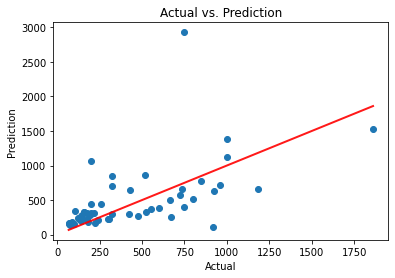

In [128]:
plt.scatter(x = y_test, y = pred_lasso)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# add 45' line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 7: Decision Tree

In [129]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [130]:
# settings of tree model for Regression problem
reg_tree = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 5, ccp_alpha = 0.01)

In [131]:
# train the tree model
tree_res = reg_tree.fit(X_train[['Years', 'Hits', 'League_N']], logy_train)

[Text(0.5769230769230769, 0.875, 'Years <= 4.5\nsquared_error = 0.788\nsamples = 210\nvalue = 5.98'),
 Text(0.3076923076923077, 0.625, 'Hits <= 112.5\nsquared_error = 0.516\nsamples = 66\nvalue = 5.131'),
 Text(0.15384615384615385, 0.375, 'Years <= 3.5\nsquared_error = 0.371\nsamples = 43\nvalue = 4.856'),
 Text(0.07692307692307693, 0.125, 'squared_error = 0.352\nsamples = 32\nvalue = 4.702'),
 Text(0.23076923076923078, 0.125, 'squared_error = 0.158\nsamples = 11\nvalue = 5.303'),
 Text(0.46153846153846156, 0.375, 'Years <= 2.5\nsquared_error = 0.381\nsamples = 23\nvalue = 5.645'),
 Text(0.38461538461538464, 0.125, 'squared_error = 0.064\nsamples = 6\nvalue = 5.041'),
 Text(0.5384615384615384, 0.125, 'squared_error = 0.318\nsamples = 17\nvalue = 5.859'),
 Text(0.8461538461538461, 0.625, 'Hits <= 117.5\nsquared_error = 0.43\nsamples = 144\nvalue = 6.369'),
 Text(0.7692307692307693, 0.375, 'Years <= 6.5\nsquared_error = 0.319\nsamples = 72\nvalue = 6.002'),
 Text(0.6923076923076923, 0.12

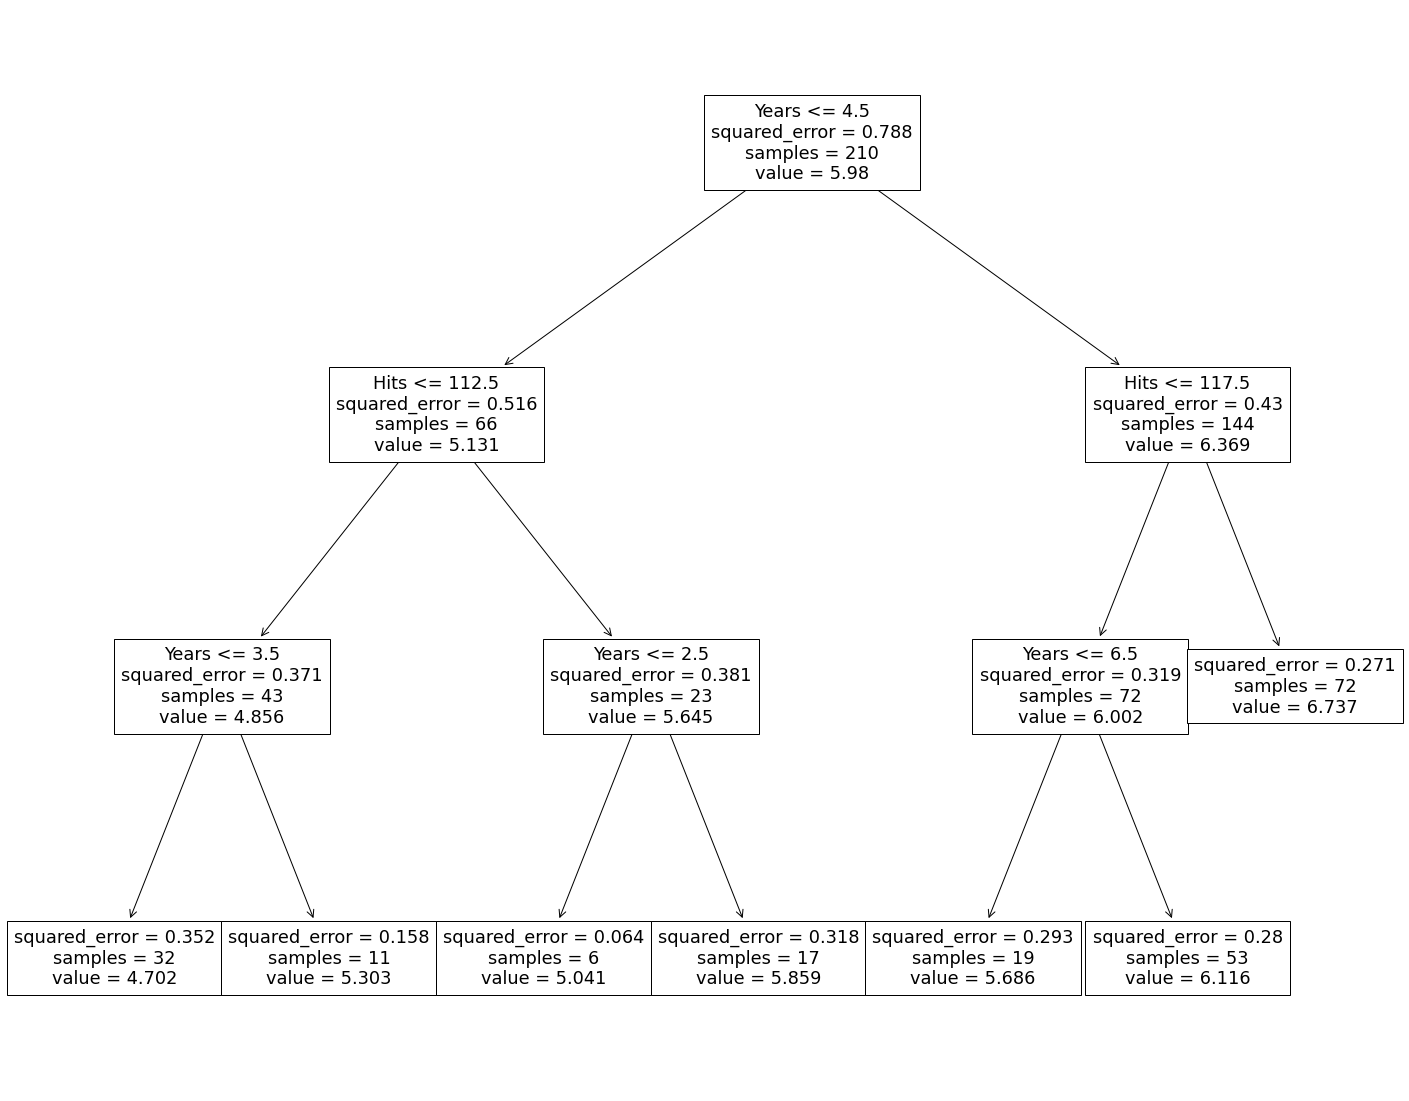

In [132]:
# Plot the tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = ['Years', 'Hits', 'League_N'])

> consider this Tree, the **Years** is the most important variable to predict **Salary**, because it comes in the root node

[Text(0.4756944444444444, 0.9166666666666666, 'Years <= 4.5\nsquared_error = 0.788\nsamples = 210\nvalue = 5.98'),
 Text(0.19444444444444445, 0.75, 'Hits <= 112.5\nsquared_error = 0.516\nsamples = 66\nvalue = 5.131'),
 Text(0.08333333333333333, 0.5833333333333334, 'Hits <= 33.5\nsquared_error = 0.371\nsamples = 43\nvalue = 4.856'),
 Text(0.05555555555555555, 0.4166666666666667, 'squared_error = 1.459\nsamples = 2\nvalue = 6.455'),
 Text(0.1111111111111111, 0.4166666666666667, 'Years <= 3.5\nsquared_error = 0.187\nsamples = 41\nvalue = 4.778'),
 Text(0.05555555555555555, 0.25, 'Hits <= 69.5\nsquared_error = 0.071\nsamples = 31\nvalue = 4.606'),
 Text(0.027777777777777776, 0.08333333333333333, 'squared_error = 0.041\nsamples = 14\nvalue = 4.438'),
 Text(0.08333333333333333, 0.08333333333333333, 'squared_error = 0.053\nsamples = 17\nvalue = 4.745'),
 Text(0.16666666666666666, 0.25, 'Hits <= 71.5\nsquared_error = 0.173\nsamples = 10\nvalue = 5.308'),
 Text(0.1388888888888889, 0.08333333333

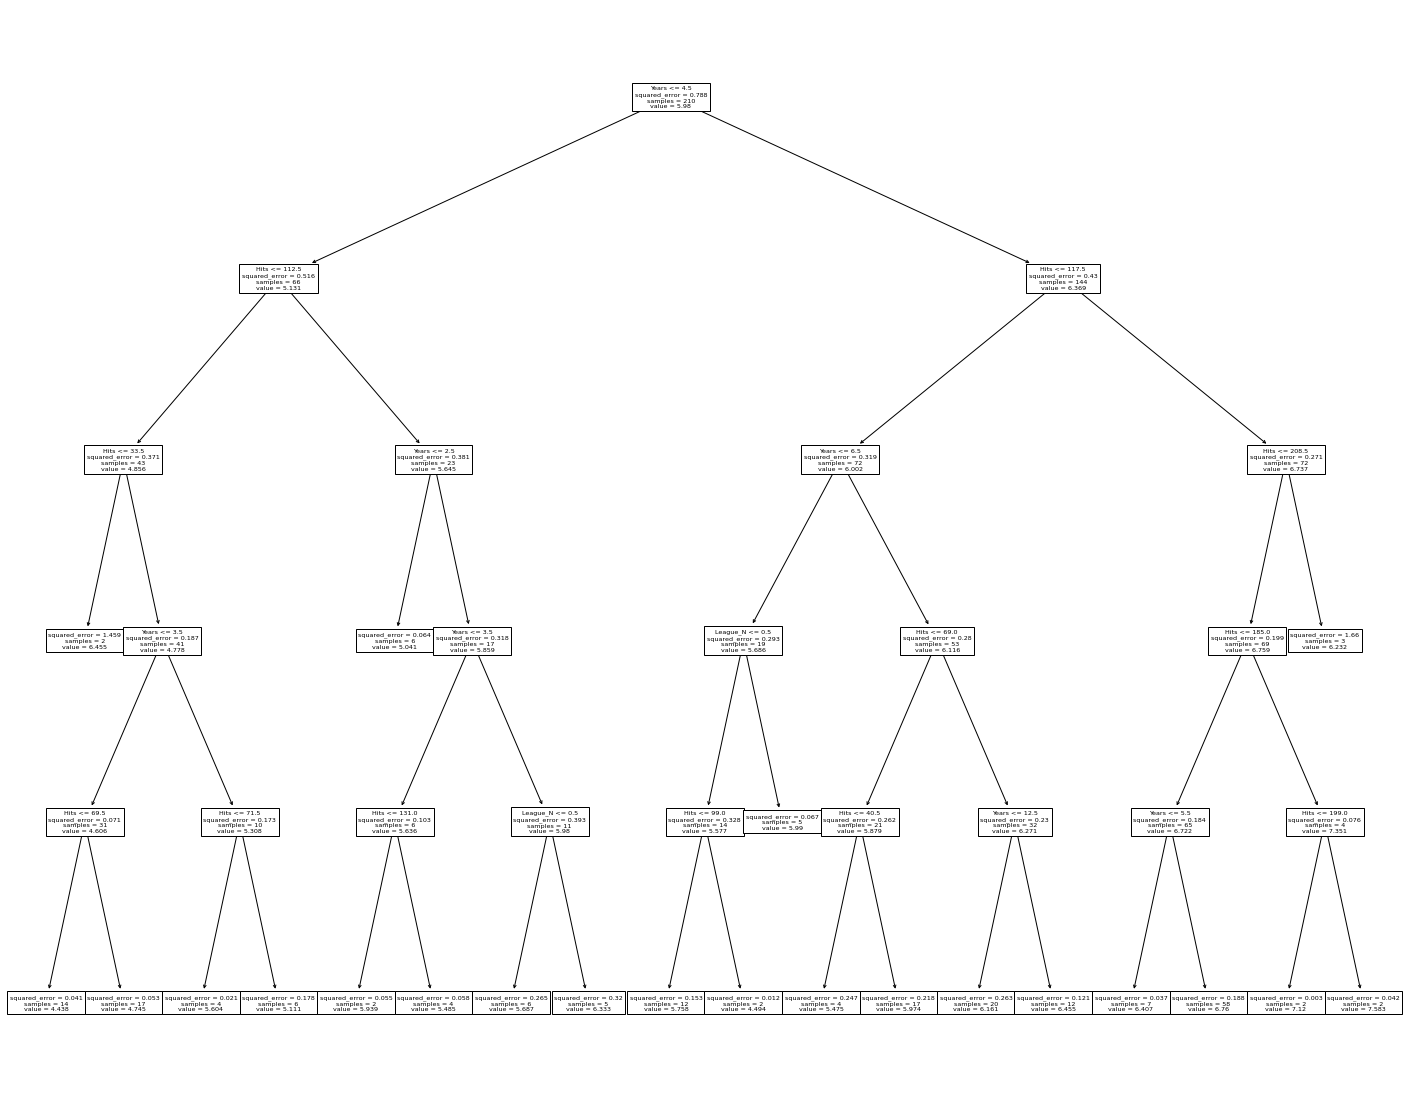

In [133]:
# another tree
reg_tree = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 2, ccp_alpha = 0.001)
tree_res = reg_tree.fit(X_train[['Years', 'Hits', 'League_N']], logy_train)

# Plot the tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = ['Years', 'Hits', 'League_N'])

Decision Tree model using All variables

[Text(0.44485294117647056, 0.9285714285714286, 'CAtBat <= 1452.0\nsquared_error = 0.788\nsamples = 210\nvalue = 5.98'),
 Text(0.20588235294117646, 0.7857142857142857, 'CHits <= 182.0\nsquared_error = 0.344\nsamples = 75\nvalue = 5.083'),
 Text(0.08823529411764706, 0.6428571428571429, 'Runs <= 18.5\nsquared_error = 0.294\nsamples = 42\nvalue = 4.74'),
 Text(0.058823529411764705, 0.5, 'squared_error = 1.201\nsamples = 5\nvalue = 5.517'),
 Text(0.11764705882352941, 0.5, 'CRuns <= 58.5\nsquared_error = 0.079\nsamples = 37\nvalue = 4.635'),
 Text(0.058823529411764705, 0.35714285714285715, 'RBI <= 36.0\nsquared_error = 0.033\nsamples = 20\nvalue = 4.462'),
 Text(0.029411764705882353, 0.21428571428571427, 'squared_error = 0.014\nsamples = 13\nvalue = 4.36'),
 Text(0.08823529411764706, 0.21428571428571427, 'squared_error = 0.013\nsamples = 7\nvalue = 4.653'),
 Text(0.17647058823529413, 0.35714285714285715, 'CRBI <= 72.5\nsquared_error = 0.057\nsamples = 17\nvalue = 4.838'),
 Text(0.14705882352

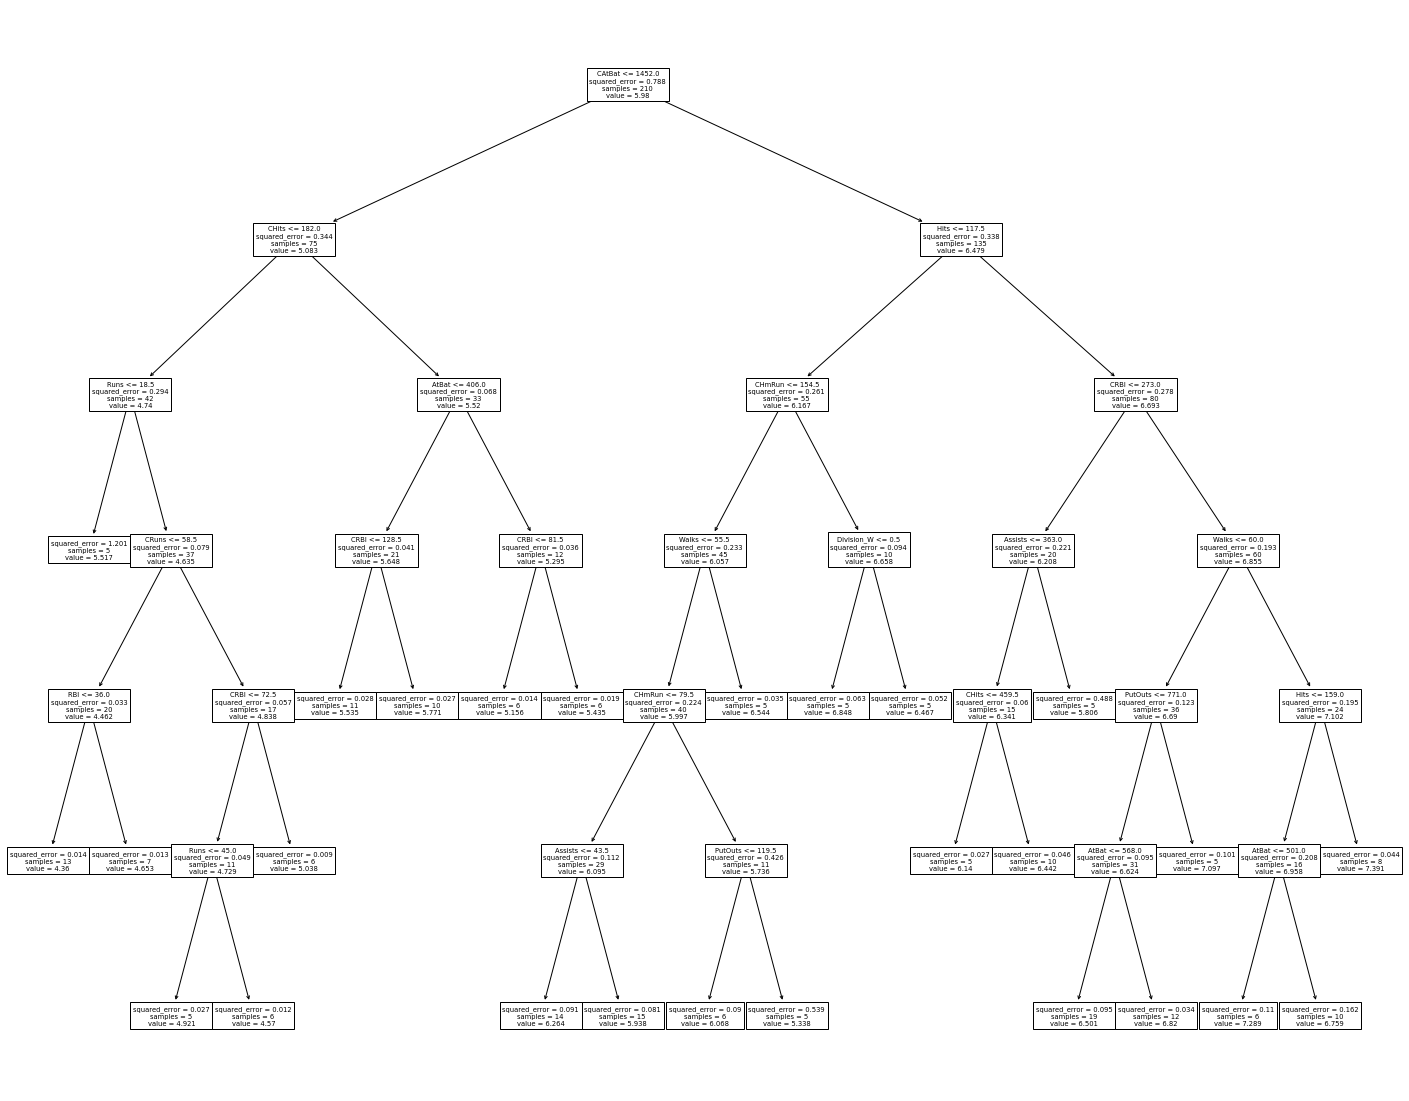

In [134]:
reg_tree = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 5, ccp_alpha = 0.001)
tree_res = reg_tree.fit(X_train.iloc[:, 1:], logy_train)

# Plot the tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = X_train.iloc[:, 1:].columns)

use k-fold Cross-Validation for tunning model's hyper-parameters

In [135]:
# create hyper-parameters grid
max_depth = [5, 7, 10]
min_samples_leaf = [5, 10, 15]
ccp_alpha = [0.0001, 0.001, 0.01]
grid = list(itertools.product(max_depth, min_samples_leaf, ccp_alpha))  # all possible combinations of hyper-parameters

grid = pd.DataFrame(data = grid, index = range(1, 28), columns = ['max_depth', 'min_samples_leaf', 'ccp_alpha'])
grid  # 27 different state

,max_depth,min_samples_leaf,ccp_alpha
1,5,5,0.0001
2,5,5,0.0010
3,5,5,0.0100
4,5,10,0.0001
5,5,10,0.0010
6,5,10,0.0100
7,5,15,0.0001
8,5,15,0.0010
9,5,15,0.0100
10,7,5,0.0001


In [136]:
# 10-fold Cross-Validation approach
k = 10
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 28))
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        reg_tree = DecisionTreeRegressor(max_depth = grid.loc[i, 'max_depth'],
                                         min_samples_leaf = grid.loc[i, 'min_samples_leaf'],
                                         ccp_alpha = grid.loc[i, 'ccp_alpha'])
        tree_res = reg_tree.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = tree_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()
        
cv_errors  # Cross-Validation Errors for 27 different tree model

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,0.335223,0.335223,0.181079,0.299952,0.299952,0.182148,0.158411,0.158411,0.164338,0.419334,...,0.164338,0.362228,0.356467,0.181079,0.299952,0.299952,0.182148,0.158411,0.158411,0.164338
2,0.298057,0.294181,0.305339,0.281048,0.281048,0.28593,0.330993,0.330993,0.283661,0.288652,...,0.283661,0.287111,0.285045,0.305339,0.281048,0.281048,0.28593,0.330993,0.330993,0.283661
3,0.122635,0.122635,0.136976,0.17825,0.17825,0.10987,0.143654,0.143654,0.10987,0.104803,...,0.10987,0.104803,0.105254,0.136976,0.17825,0.17825,0.10987,0.143654,0.143654,0.10987
4,0.247319,0.247319,0.229247,0.16333,0.16333,0.169197,0.126156,0.126156,0.143583,0.276988,...,0.143583,0.284502,0.288927,0.229247,0.16333,0.16333,0.169197,0.126156,0.126156,0.143583
5,0.172959,0.17364,0.200546,0.199693,0.199693,0.194091,0.165419,0.165419,0.164937,0.23026,...,0.164937,0.218217,0.223426,0.200546,0.199693,0.199693,0.194091,0.165419,0.165419,0.164937
6,0.319979,0.308821,0.258687,0.289077,0.289225,0.27032,0.250822,0.250822,0.27032,0.245192,...,0.27032,0.245192,0.215114,0.258687,0.255173,0.255321,0.27032,0.250822,0.250822,0.27032
7,0.195575,0.198009,0.226792,0.200487,0.200487,0.207741,0.196022,0.196022,0.215922,0.207792,...,0.215922,0.209272,0.206427,0.226792,0.200487,0.200487,0.207741,0.196022,0.196022,0.215922
8,0.508114,0.516703,0.585114,0.680707,0.680707,0.61903,0.676007,0.676007,0.61903,0.577649,...,0.61903,0.634257,0.644127,0.585114,0.680707,0.680707,0.61903,0.676007,0.676007,0.61903
9,0.387065,0.390653,0.322674,0.331198,0.331198,0.28256,0.309651,0.309651,0.295698,0.383805,...,0.295698,0.382548,0.385321,0.322674,0.321079,0.321079,0.28256,0.309651,0.309651,0.295698
10,0.329599,0.332212,0.262268,0.324828,0.324928,0.265396,0.255496,0.255496,0.267829,0.423548,...,0.267829,0.423548,0.420461,0.262268,0.324828,0.324928,0.265396,0.255496,0.255496,0.267829


In [138]:
cv_errors.mean(axis = 0)

1     0.291652
2     0.291939
3     0.270872
4     0.294857
5     0.294882
6     0.258628
7     0.261263
8     0.261263
9     0.253519
10    0.315802
11    0.307737
12    0.270872
13    0.290455
14    0.290480
15    0.258628
16    0.261263
17    0.261263
18    0.253519
19    0.315168
20    0.313057
21    0.270872
22    0.290455
23    0.290480
24    0.258628
25    0.261263
26    0.261263
27    0.253519
dtype: float64

In [139]:
cv_errors.mean(axis = 0).argmin() + 1

27

In [140]:
# the Best model's hyper-parameters
grid.iloc[cv_errors.mean(axis = 0).argmin()]

max_depth           10.00
min_samples_leaf    15.00
ccp_alpha            0.01
Name: 27, dtype: float64

### Prediction on Test dataset
use Model 7 for prediction on Test dataset

[Text(0.375, 0.9, 'CAtBat <= 1452.0\nsquared_error = 0.788\nsamples = 210\nvalue = 5.98'),
 Text(0.16666666666666666, 0.7, 'CHits <= 182.0\nsquared_error = 0.344\nsamples = 75\nvalue = 5.083'),
 Text(0.08333333333333333, 0.5, 'squared_error = 0.294\nsamples = 42\nvalue = 4.74'),
 Text(0.25, 0.5, 'squared_error = 0.068\nsamples = 33\nvalue = 5.52'),
 Text(0.5833333333333334, 0.7, 'Hits <= 117.5\nsquared_error = 0.338\nsamples = 135\nvalue = 6.479'),
 Text(0.4166666666666667, 0.5, 'Walks <= 43.5\nsquared_error = 0.261\nsamples = 55\nvalue = 6.167'),
 Text(0.3333333333333333, 0.3, 'squared_error = 0.251\nsamples = 38\nvalue = 6.023'),
 Text(0.5, 0.3, 'squared_error = 0.136\nsamples = 17\nvalue = 6.487'),
 Text(0.75, 0.5, 'CRBI <= 273.0\nsquared_error = 0.278\nsamples = 80\nvalue = 6.693'),
 Text(0.6666666666666666, 0.3, 'squared_error = 0.221\nsamples = 20\nvalue = 6.208'),
 Text(0.8333333333333334, 0.3, 'Walks <= 60.0\nsquared_error = 0.193\nsamples = 60\nvalue = 6.855'),
 Text(0.75, 0.1

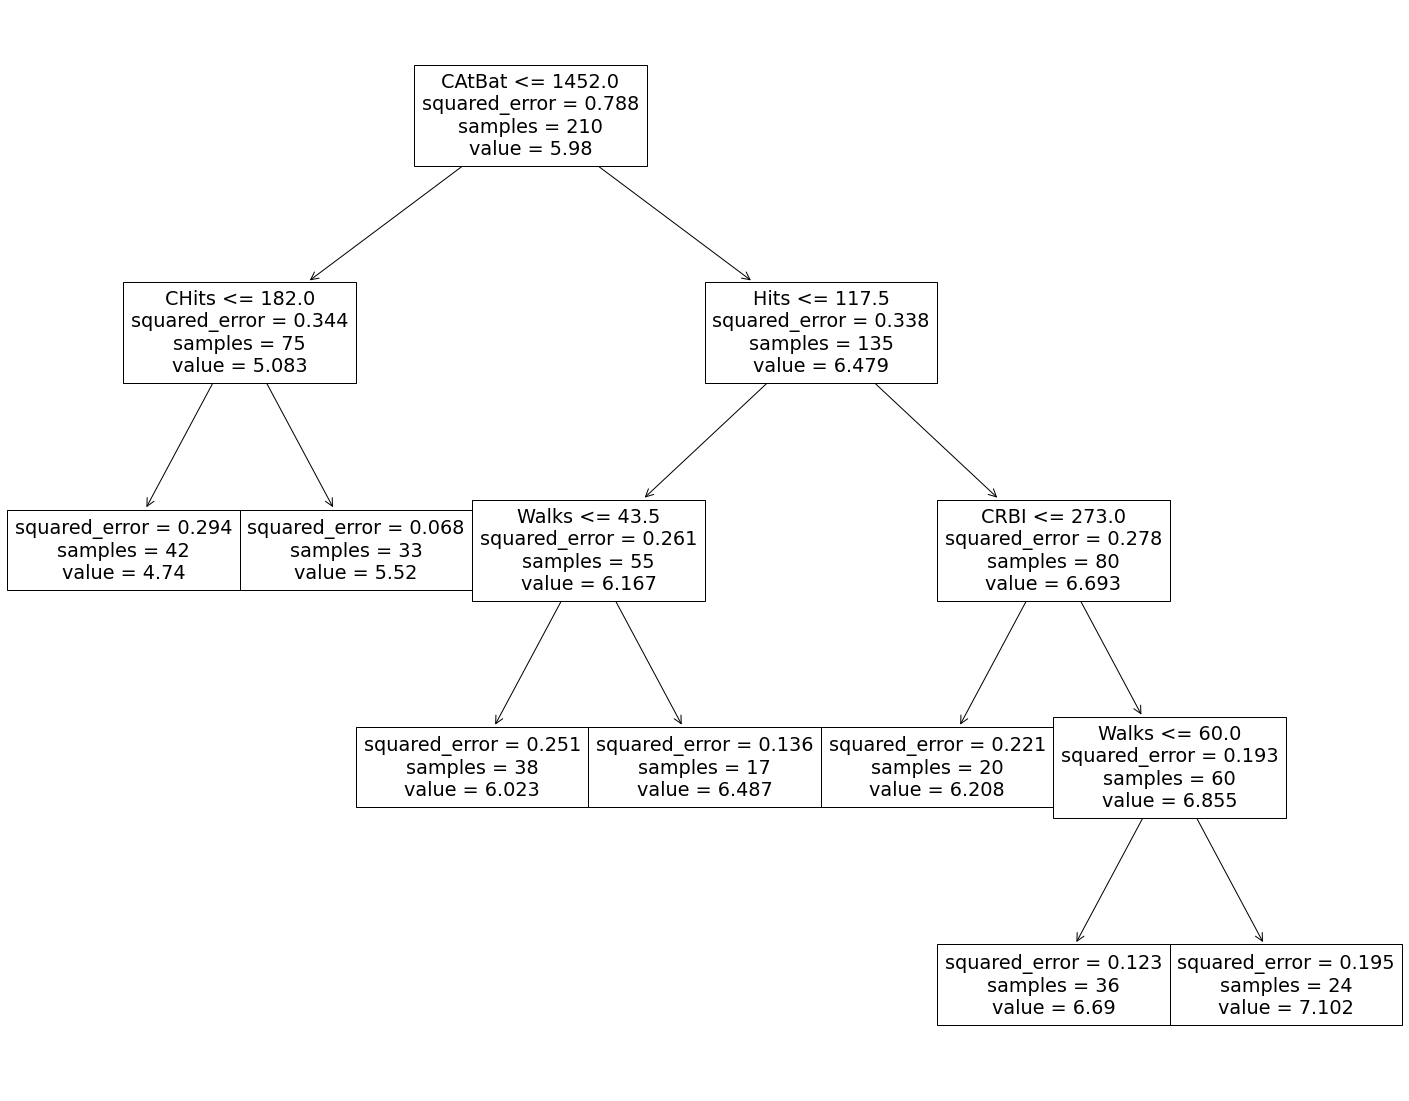

In [141]:
reg_tree = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 15, ccp_alpha = 0.01)
tree_res = reg_tree.fit(X_train.iloc[:, 1:], logy_train)

# Plot the tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = X_train.iloc[:, 1:].columns)

In [142]:
pred_tree = tree_res.predict(X_test.iloc[:, 1:])
pred_tree = np.exp(pred_tree)
pred_tree

array([ 114.45065654,  412.99705229,  412.99705229,  114.45065654,
        114.45065654,  804.28674482, 1214.95423456,  249.51767434,
        249.51767434,  412.99705229,  249.51767434, 1214.95423456,
        249.51767434,  804.28674482,  412.99705229,  114.45065654,
        249.51767434,  249.51767434,  114.45065654,  114.45065654,
        249.51767434,  656.31727516,  114.45065654,  412.99705229,
       1214.95423456,  249.51767434,  412.99705229,  412.99705229,
        114.45065654,  412.99705229,  412.99705229,  114.45065654,
        249.51767434,  249.51767434,  114.45065654,  249.51767434,
       1214.95423456,  114.45065654,  114.45065654,  804.28674482,
        412.99705229,  656.31727516,  804.28674482, 1214.95423456,
        249.51767434,  114.45065654,  114.45065654,  412.99705229,
        249.51767434,  412.99705229,  249.51767434, 1214.95423456,
        412.99705229])

Absolute Error

In [143]:
abs_err_tree = abs(y_test - pred_tree)

Absolute Error mean, median, sd, IQR, max, min

In [144]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_tree.mean(),
                                             'Median of AbsErrors': abs_err_tree.median(),
                                             'SD of AbsErrors': abs_err_tree.std(),
                                             'IQR of AbsErrors': iqr(abs_err_tree),
                                             'Min of AbsErrors': abs_err_tree.min(),
                                             'Max of AbsErrors': abs_err_tree.max()},
                                           index = ['Decision Tree Reg']),
                              ignore_index = False)
model_comp

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\4219517715.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_tree.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.655840,151.512877,295.713462,134.062787,7.276021,1918.343520
LASSO Reg,235.792523,142.046274,324.584648,156.449536,3.819490,2180.334024
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343


Actual vs. Prediction

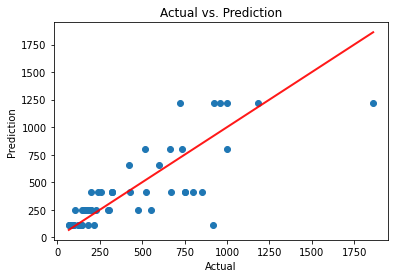

In [145]:
plt.scatter(x = y_test, y = pred_tree)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# add 45' line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 8: Bagging
### Prediction on Test dataset
use Model 8 for prediction on Test dataset

In [146]:
from sklearn.ensemble import RandomForestRegressor

bagging_reg = RandomForestRegressor(max_features = 19, random_state = 123, n_estimators = 500)
bagging_res = bagging_reg.fit(X_train.iloc[:, 1:], logy_train)
pred_bagging = bagging_res.predict(X_test.iloc[:, 1:])
pred_bagging = np.exp(pred_bagging)
pred_bagging

array([ 742.15541124,  476.43806273,  434.21387429,  119.22547594,
         94.1831841 ,  725.73791104, 1110.79605701,  314.01352578,
        174.75814358,  598.42789947,  215.49199945, 1091.62036993,
        209.54565423,  696.77976194,  715.97877326,  150.0152939 ,
        257.37539354,  199.78237021,   86.14182284,  169.59407944,
        240.18333711,  452.98549259,   97.20705531,  554.56196326,
       1158.08271024,  195.24650657,  386.18964396,  663.9473724 ,
        159.76386804,  451.1595796 ,  473.09888271,  116.91032922,
        259.98672429,  233.50556754,   88.83556099,  236.09507937,
        793.70065664,  106.53206762,  104.29714913,  736.21287323,
        520.46615734,  635.79586237,  730.02307213,  660.12619691,
        262.59179866,  151.97959831,  127.50434186,  449.28738831,
        239.51542084,  513.77267796,  173.48723862,  899.12553649,
        729.6518574 ])

Absolute Error

In [147]:
abs_err_bagging = abs(y_test - pred_bagging)

Absolute Error mean, median, sd, IQR, max, min

In [148]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_bagging.mean(),
                                             'Median of AbsErrors': abs_err_bagging.median(),
                                             'SD of AbsErrors': abs_err_bagging.std(),
                                             'IQR of AbsErrors': iqr(abs_err_bagging),
                                             'Min of AbsErrors': abs_err_bagging.min(),
                                             'Max of AbsErrors': abs_err_bagging.max()},
                                           index = ['Bagging Reg']),
                              ignore_index = False)
model_comp

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\1574733046.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_bagging.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.655840,151.512877,295.713462,134.062787,7.276021,1918.343520
LASSO Reg,235.792523,142.046274,324.584648,156.449536,3.819490,2180.334024
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343
Bagging Reg,109.744060,63.237911,132.899213,130.797576,0.217630,703.377290


Actual vs. Prediction

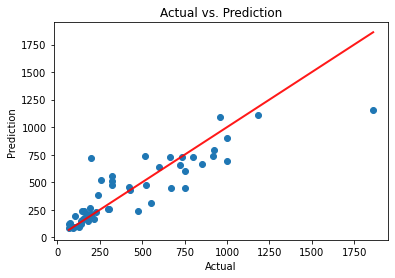

In [149]:
plt.scatter(x = y_test, y = pred_bagging)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# add 45' line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 9: Random Forest

In [150]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_features = 6, random_state = 123, n_estimators = 500)
rf_res = rf_reg.fit(X_train.iloc[:, 1:], logy_train)

Importance of Variables: the percentage of increasing MSE if we remove the variable from the Tree

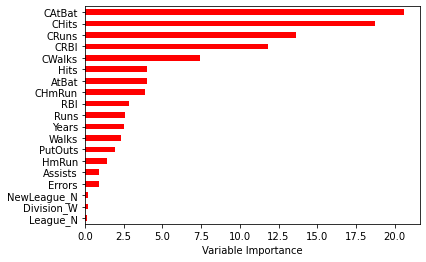

In [151]:
importance = pd.DataFrame({'Importance': rf_res.feature_importances_ * 100}, index = X_train.iloc[:, 1:].columns)
importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### Prediction on Test dataset
use Model 9 for prediction on Test dataset

In [152]:
pred_rf = rf_res.predict(X_test.iloc[:, 1:])
pred_rf = np.exp(pred_rf)
pred_rf

array([ 717.61023751,  511.89430517,  453.38119999,  118.28017568,
         98.41766757,  724.76226158, 1026.88499725,  356.69286332,
        174.36951741,  564.95741865,  221.34623155,  986.10766701,
        242.34352307,  745.35323492,  711.03207006,  152.60710296,
        259.80267951,  196.64886712,   88.89318971,  185.21938299,
        213.8027622 ,  447.11015188,   98.61197511,  546.48868956,
       1129.00189972,  203.30778814,  364.87570943,  663.94646919,
        172.59459002,  494.7073727 ,  472.45818067,  123.9057    ,
        280.15959981,  236.23121981,   88.20196826,  260.44246727,
        727.76233507,  105.44607975,  101.51495576,  758.0635821 ,
        534.24941377,  616.66292191,  710.30903275,  696.90021526,
        264.4766053 ,  153.30779894,  134.34598087,  444.50217709,
        257.77261297,  539.24296508,  172.32052142,  916.88031025,
        658.70605207])

Absolute Error

In [153]:
abs_err_rf = abs(y_test - pred_rf)

Absolute Error mean, median, sd, IQR, max, min

In [154]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_rf.mean(),
                                             'Median of AbsErrors': abs_err_rf.median(),
                                             'SD of AbsErrors': abs_err_rf.std(),
                                             'IQR of AbsErrors': iqr(abs_err_rf),
                                             'Min of AbsErrors': abs_err_rf.min(),
                                             'Max of AbsErrors': abs_err_rf.max()},
                                           index = ['Random Forest Reg']),
                              ignore_index = False)
model_comp

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\3215908392.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_rf.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.655840,151.512877,295.713462,134.062787,7.276021,1918.343520
LASSO Reg,235.792523,142.046274,324.584648,156.449536,3.819490,2180.334024
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343
Bagging Reg,109.744060,63.237911,132.899213,130.797576,0.217630,703.377290
Random Forest Reg,111.688693,59.345981,134.516076,164.784153,1.388025,732.458100


Actual vs. Prediction

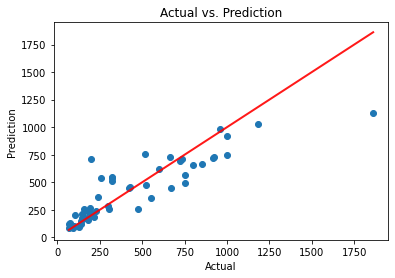

In [155]:
plt.scatter(x = y_test, y = pred_rf)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# add 45' line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 10: GBoost Regression

In [156]:
from sklearn.ensemble import GradientBoostingRegressor

boosting_reg = GradientBoostingRegressor(learning_rate = 0.1,
                                         n_estimators = 1000,
                                         subsample = 1.0,
                                         max_depth = 5,
                                         min_samples_leaf = 5,
                                         random_state = 1234)
boosting_res = boosting_reg.fit(X_train.iloc[:, 1:], logy_train)

use k-fold Cross-Validation for tunning model's hyper-parameters

In [157]:
# create hyper-parameters grid
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 0.9]
max_depth = [1, 3, 5]
grid = list(itertools.product(learning_rate, subsample, max_depth))
grid = pd.DataFrame(data = grid, index = range(1, 28), columns = ['learning_rate', 'subsample', 'max_depth'])
grid

,learning_rate,subsample,max_depth
1,0.001,0.5,1
2,0.001,0.5,3
3,0.001,0.5,5
4,0.001,0.7,1
5,0.001,0.7,3
6,0.001,0.7,5
7,0.001,0.9,1
8,0.001,0.9,3
9,0.001,0.9,5
10,0.010,0.5,1


In [158]:
k = 10  # 10-fold Cross-Validation
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 28))
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        boosting_reg = GradientBoostingRegressor(learning_rate = grid.loc[i, 'learning_rate'],
                                                 subsample = grid.loc[i, 'subsample'],
                                                 max_depth = grid.loc[i, 'max_depth'],
                                                 min_samples_leaf = 5,
                                                 n_estimators = 100,
                                                 random_state = 1234)
        boosting_res = boosting_reg.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = boosting_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j-1, i-1] = ((logy_train[folds == j] - pred) ** 2).mean()
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,0.395272,0.381611,0.380888,0.39511,0.381027,0.381954,0.394955,0.387669,0.387915,0.174714,...,0.148001,0.128105,0.136294,0.162784,0.145121,0.175058,0.193079,0.154735,0.145759,0.150778
2,0.882864,0.855243,0.850038,0.882594,0.850648,0.844851,0.882077,0.848513,0.844598,0.490632,...,0.350888,0.297987,0.249888,0.286396,0.271702,0.279746,0.293992,0.276834,0.263187,0.253396
3,0.60938,0.58965,0.588064,0.610447,0.586176,0.584678,0.607726,0.584773,0.580617,0.27867,...,0.1778,0.108219,0.144741,0.123996,0.084912,0.140486,0.152113,0.084343,0.115713,0.138496
4,0.67582,0.661036,0.657307,0.675562,0.666097,0.659696,0.67484,0.668727,0.660135,0.372873,...,0.296554,0.150613,0.173972,0.188744,0.150224,0.152747,0.188824,0.150489,0.174045,0.166971
5,0.646553,0.632892,0.629744,0.646708,0.633942,0.628534,0.646729,0.634712,0.628648,0.327678,...,0.250708,0.161689,0.155827,0.139087,0.174131,0.180112,0.135763,0.207933,0.207286,0.160594
6,0.960675,0.921265,0.915252,0.960733,0.924446,0.913537,0.960294,0.929263,0.914615,0.503872,...,0.327973,0.195498,0.165377,0.189208,0.196746,0.171544,0.174607,0.184264,0.181454,0.116995
7,0.598891,0.590497,0.586908,0.597491,0.590226,0.586322,0.600075,0.589511,0.584007,0.320013,...,0.266302,0.192636,0.220151,0.170909,0.210662,0.171505,0.177252,0.211909,0.174893,0.182922
8,1.085753,1.0606,1.05936,1.086993,1.061596,1.062601,1.087316,1.059435,1.064455,0.661378,...,0.642646,0.566658,0.561657,0.568731,0.535042,0.520345,0.544632,0.533122,0.583474,0.561849
9,0.579627,0.577999,0.57719,0.580505,0.583154,0.583936,0.580272,0.587207,0.590616,0.30131,...,0.344518,0.303558,0.351228,0.339924,0.317748,0.355243,0.351221,0.29046,0.362862,0.309446
10,0.625022,0.604996,0.602562,0.62517,0.600527,0.600022,0.6244,0.600652,0.598323,0.312462,...,0.26234,0.320342,0.278519,0.376009,0.290519,0.30785,0.310041,0.270295,0.328087,0.290232


In [160]:
cv_errors.mean(axis = 0)

1     0.705986
2     0.687579
3     0.684731
4     0.706131
5     0.687784
6     0.684613
7     0.705868
8     0.689046
9     0.685393
10    0.374360
11    0.306673
12    0.299522
13    0.374038
14    0.309723
15    0.301667
16    0.376195
17    0.309603
18    0.306773
19    0.242531
20    0.243765
21    0.254579
22    0.237681
23    0.245464
24    0.252153
25    0.236438
26    0.253676
27    0.233168
dtype: float64

In [161]:
cv_errors.mean(axis = 0).argmin() + 1

27

In [162]:
grid.iloc[cv_errors.mean(axis = 0).argmin()]

learning_rate    0.1
subsample        0.9
max_depth        5.0
Name: 27, dtype: float64

### Prediction on Test dataset
use Model 10 for prediction on Test dataset

In [163]:
boosting_reg = GradientBoostingRegressor(learning_rate = 0.1,
                                         n_estimators = 100,
                                         subsample = 0.9,
                                         max_depth = 5,
                                         min_samples_leaf = 5,
                                         random_state = 1234)
boosting_res = boosting_reg.fit(X_train.iloc[:, 1:], logy_train)

In [164]:
pred_boosting = boosting_res.predict(X_test.iloc[:, 1:])
pred_boosting = np.exp(pred_boosting)
pred_boosting

array([ 383.22486966,  433.46006778,  425.67578909,  130.46707153,
        107.08627902,  808.74571793, 1294.6043678 ,  333.96850631,
        189.54130484,  887.35607851,  254.41026307, 1039.06587051,
        207.59180283,  700.60532666,  687.28372253,  143.55787355,
        229.97442842,  182.34405455,  102.98114811,  171.89101454,
        266.62190422,  467.52325804,  121.50876063,  482.75852132,
       1142.66919902,  175.18006625,  406.75608497,  663.24613698,
        163.40321805,  609.68495122,  479.41206529,  162.9281222 ,
        264.60264432,  258.54356693,   90.42524108,  216.77665561,
        588.23890753,  107.82861328,  110.01792909,  731.89933163,
        626.1831529 ,  728.56940142,  732.04505097,  687.25440267,
        232.20393057,  128.70659421,  286.55014678,  388.97477544,
        246.55673304,  418.69917872,  155.07979743, 1048.72610162,
        909.98289364])

Absolute Error

In [165]:
abs_err_boosting = abs(y_test - pred_boosting)

Absolute Error mean, median, sd, IQR, max, min

In [166]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_boosting.mean(),
                                             'Median of AbsErrors': abs_err_boosting.median(),
                                             'SD of AbsErrors': abs_err_boosting.std(),
                                             'IQR of AbsErrors': iqr(abs_err_boosting),
                                             'Min of AbsErrors': abs_err_boosting.min(),
                                             'Max of AbsErrors': abs_err_boosting.max()},
                                           index = ['SGB Reg']),
                              ignore_index = False)
model_comp

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\2180597833.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_boosting.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.655840,151.512877,295.713462,134.062787,7.276021,1918.343520
LASSO Reg,235.792523,142.046274,324.584648,156.449536,3.819490,2180.334024
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343
Bagging Reg,109.744060,63.237911,132.899213,130.797576,0.217630,703.377290
Random Forest Reg,111.688693,59.345981,134.516076,164.784153,1.388025,732.458100
SGB Reg,125.450238,75.025572,146.256763,124.214954,0.425241,718.790801


Actual vs. Prediction

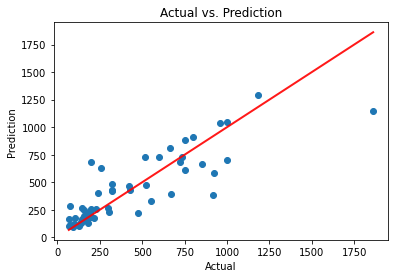

In [167]:
plt.scatter(x = y_test, y = pred_boosting)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# add 45' line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 11: XGBoost Regression

In [168]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators = 1000,
                       max_depth = 5,
                       learning_rate = 0.01,
                       subsample = 0.9,
                       colsample_bytree = 0.3,
                       reg_alpha = 0.1,
                       n_jobs = -1,
                       random_state = 1234)
xgb_res = xgb_reg.fit(X_train.iloc[:, 1:], logy_train)

use k-fold Cross-Validation for tunning model's hyper-parameters

In [169]:
# create hyper-parameters grid
learning_rate = [0.001, 0.01, 0.1]
colsample_bytree = [0.3, 0.6, 0.9]
max_depth = [1, 3, 5]
reg_alpha = [0, 0.1, 0.01]
reg_lambda = [0, 0.1, 0.01]
grid = list(itertools.product(learning_rate, colsample_bytree, max_depth, reg_alpha, reg_lambda))
grid = pd.DataFrame(data = grid, index = range(1, 244), columns = ['learning_rate', 
                                                                   'colsample_bytree',
                                                                   'max_depth',
                                                                   'reg_alpha',
                                                                   'reg_lambda'])
grid

,learning_rate,colsample_bytree,max_depth,reg_alpha,reg_lambda
1,0.001,0.3,1,0.00,0.00
2,0.001,0.3,1,0.00,0.10
3,0.001,0.3,1,0.00,0.01
4,0.001,0.3,1,0.10,0.00
5,0.001,0.3,1,0.10,0.10
...,...,...,...,...,...
239,0.100,0.9,5,0.10,0.10
240,0.100,0.9,5,0.10,0.01
241,0.100,0.9,5,0.01,0.00
242,0.100,0.9,5,0.01,0.10


In [170]:
k = 10  # 10-fold Cross-Validation
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 244))
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,234,235,236,237,238,239,240,241,242,243
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        xgb_reg = XGBRegressor(n_estimators = 1000,
                               max_depth = grid.loc[i, 'max_depth'],
                               learning_rate = grid.loc[i, 'learning_rate'],
                               subsample = 0.9,
                               colsample_bytree = grid.loc[i, 'colsample_bytree'],
                               reg_alpha = grid.loc[i, 'reg_alpha'],
                               reg_lambda = grid.loc[i, 'reg_lambda'],
                               n_jobs = -1,
                               random_state = 1234)
        xgb_res = xgb_reg.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = xgb_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,234,235,236,237,238,239,240,241,242,243
1,4.754841,4.765194,4.75561,4.758146,4.768359,4.758951,4.754808,4.76522,4.756053,4.647898,...,0.187055,0.194353,0.125312,0.190008,0.18353,0.140626,0.161069,0.205052,0.141791,0.193753
2,4.492925,4.503635,4.494011,4.496482,4.506338,4.497513,4.493124,4.50381,4.494607,4.412579,...,0.251803,0.311186,0.287409,0.317288,0.277295,0.263386,0.263696,0.288038,0.283637,0.295669
3,3.16444,3.171158,3.164524,3.166762,3.174565,3.167311,3.16445,3.1715,3.164719,3.228464,...,0.128167,0.161374,0.118205,0.154858,0.122147,0.11282,0.116267,0.158735,0.126545,0.15799
4,4.880626,4.887747,4.880973,4.882568,4.890565,4.882891,4.880317,4.888681,4.881247,4.80189,...,0.152479,0.154714,0.153406,0.147549,0.141302,0.158567,0.142095,0.148611,0.151795,0.140146
5,4.376037,4.381727,4.37665,4.377105,4.383891,4.378347,4.375839,4.381475,4.376834,4.575573,...,0.311585,0.237069,0.272956,0.256729,0.342751,0.324652,0.281578,0.251794,0.28242,0.269502
6,4.54096,4.550646,4.542182,4.543451,4.55332,4.544541,4.541598,4.551207,4.542552,4.48861,...,0.189205,0.191553,0.188488,0.194952,0.191699,0.18411,0.189617,0.222087,0.153726,0.202964
7,4.866568,4.869644,4.86681,4.866472,4.870174,4.867354,4.866495,4.869953,4.867085,4.875217,...,0.185323,0.220793,0.210742,0.211967,0.194976,0.19896,0.207226,0.224807,0.198242,0.23267
8,5.063808,5.079207,5.065272,5.06917,5.084871,5.070939,5.064241,5.079661,5.065709,4.858882,...,0.528743,0.492947,0.608559,0.521559,0.558548,0.591941,0.544033,0.498726,0.565971,0.498699
9,3.770304,3.78295,3.772197,3.774299,3.786238,3.775617,3.771626,3.783031,3.772702,3.629513,...,0.289782,0.248421,0.290703,0.278498,0.279812,0.318193,0.309737,0.287718,0.305216,0.287197
10,4.079607,4.089198,4.080446,4.083059,4.092162,4.08447,4.080035,4.089484,4.080783,4.133233,...,0.330945,0.369813,0.362569,0.358801,0.371195,0.370992,0.347843,0.362784,0.371874,0.345382


In [172]:
cv_errors.mean(axis = 0)

1      4.399012
2      4.408111
3      4.399868
4      4.401751
5      4.411048
         ...   
239    0.266425
240    0.256316
241    0.264835
242    0.258122
243    0.262397
Length: 243, dtype: float64

In [173]:
cv_errors.mean(axis = 0).argmin() + 1

100

In [174]:
grid.iloc[cv_errors.mean(axis = 0).argmin()]

learning_rate       0.01
colsample_bytree    0.30
max_depth           5.00
reg_alpha           0.00
reg_lambda          0.00
Name: 100, dtype: float64

### Prediction on Test dataset
use Model 11 for prediction on Test dataset

In [175]:
xgb_reg = XGBRegressor(n_estimators = 1000,
                        max_depth = 5,
                        learning_rate = 0.01,
                        subsample = 0.9,
                        colsample_bytree = 0.3,
                        reg_alpha = 0,
                        reg_lambda = 0,
                        n_jobs = -1,
                        random_state = 1234)
xgb_res = xgb_reg.fit(X_train.iloc[:, 1:], logy_train)

In [176]:
pred_xgb = xgb_res.predict(X_test.iloc[:, 1:])
pred_xgb = np.exp(pred_xgb)
pred_xgb

array([1966.561   ,  502.97122 ,  408.1216  ,  126.71855 ,  101.94112 ,
        717.2997  , 1147.3655  ,  371.27713 ,  178.44933 ,  621.21826 ,
        230.89426 , 1068.1841  ,  264.54517 ,  711.5999  ,  749.35376 ,
        142.81313 ,  276.98328 ,  217.1815  ,   87.40275 ,  212.18187 ,
        206.09412 ,  431.33127 ,   96.243195,  539.3446  , 1317.5212  ,
        221.73131 ,  327.48914 ,  642.71576 ,  181.46576 ,  533.4829  ,
        454.66644 ,  114.161   ,  287.8881  ,  265.78897 ,   87.59137 ,
        265.10217 ,  598.24023 ,  107.78331 ,   94.05224 ,  657.0694  ,
        524.91583 ,  710.9287  ,  659.26465 ,  696.2197  ,  281.7033  ,
        133.66678 ,  110.61854 ,  476.33347 ,  251.49149 ,  472.58652 ,
        179.81592 , 1026.8228  ,  799.13416 ], dtype=float32)

Absolute Error

In [177]:
abs_err_xgb = abs(y_test - pred_xgb)

Absolute Error mean, median, sd, IQR, max, min

In [178]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_xgb.mean(),
                                             'Median of AbsErrors': abs_err_xgb.median(),
                                             'SD of AbsErrors': abs_err_xgb.std(),
                                             'IQR of AbsErrors': iqr(abs_err_xgb),
                                             'Min of AbsErrors': abs_err_xgb.min(),
                                             'Max of AbsErrors': abs_err_xgb.max()},
                                           index = ['XGB Reg']),
                              ignore_index = False)
model_comp

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\2191396255.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_xgb.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.655840,151.512877,295.713462,134.062787,7.276021,1918.343520
LASSO Reg,235.792523,142.046274,324.584648,156.449536,3.819490,2180.334024
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343
Bagging Reg,109.744060,63.237911,132.899213,130.797576,0.217630,703.377290
Random Forest Reg,111.688693,59.345981,134.516076,164.784153,1.388025,732.458100
SGB Reg,125.450238,75.025572,146.256763,124.214954,0.425241,718.790801


Actual vs. Prediction

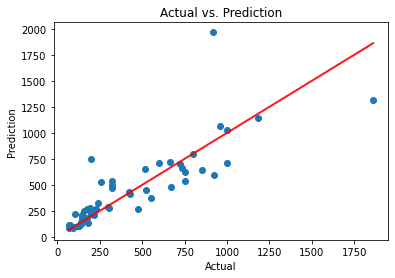

In [179]:
plt.scatter(x = y_test, y = pred_xgb)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# add 45' line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 12: ANN

In [180]:
# Create binary dummy variables for Categorical variables (One-Hot Encoding)
dummies = pd.get_dummies(train[['League', 'Division', 'NewLeague']])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
98,0,1,0,1,0,1
206,0,1,0,1,0,1
54,1,0,1,0,1,0
177,1,0,1,0,1,0
27,0,1,0,1,0,1


In [181]:
# Define the features set X
X_ = train.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_train = pd.concat([X_, dummies], axis = 1)

# Define response variable
y_train = np.log(train['Salary'])

In [182]:
X_train.head()  # features matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
98,415,115,27,97,71,68,3,711,184,45,...,99,274,2,7,0,1,0,1,0,1
206,407,93,8,47,30,30,2,969,230,14,...,68,172,317,25,0,1,0,1,0,1
54,403,101,12,45,53,39,12,5150,1429,166,...,526,316,6,5,1,0,1,0,1,0
177,441,118,28,84,86,68,8,2723,750,126,...,309,190,2,2,1,0,1,0,1,0
27,474,129,10,50,56,40,10,2331,604,61,...,166,732,83,13,0,1,0,1,0,1


In [183]:
y_train.head()  # response matrix

98     5.703782
206    5.010635
54     6.514713
177    7.170120
27     6.620073
Name: Salary, dtype: float64

In [184]:
# Min-Max Normalization to scale the train data
from sklearn.preprocessing import MinMaxScaler
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,0.592204,0.481013,0.675,0.746154,0.586777,0.647619,0.105263,0.070623,0.067988,0.082117,...,0.069041,0.198983,0.004065,0.241379,0.0,1.0,0.0,1.0,0.0,1.0
1,0.580210,0.388186,0.200,0.361538,0.247934,0.285714,0.052632,0.097818,0.085859,0.025547,...,0.046512,0.124909,0.644309,0.862069,0.0,1.0,0.0,1.0,0.0,1.0
2,0.574213,0.421941,0.300,0.346154,0.438017,0.371429,0.578947,0.538526,0.551671,0.302920,...,0.379360,0.229484,0.012195,0.172414,1.0,0.0,1.0,0.0,1.0,0.0
3,0.631184,0.493671,0.700,0.646154,0.710744,0.647619,0.368421,0.282703,0.287879,0.229927,...,0.221657,0.137981,0.004065,0.068966,1.0,0.0,1.0,0.0,1.0,0.0
4,0.680660,0.540084,0.250,0.384615,0.462810,0.380952,0.473684,0.241383,0.231158,0.111314,...,0.117733,0.531590,0.168699,0.448276,0.0,1.0,0.0,1.0,0.0,1.0


In [185]:
X_train_scaled.describe()

# 'min' of all columns should be 0
# 'max' of all columns should be 1

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.583223,0.459594,0.297024,0.429780,0.432153,0.398458,0.337343,0.275936,0.276742,0.128398,...,0.185763,0.212072,0.227400,0.283744,0.538095,0.461905,0.476190,0.523810,0.552381,0.447619
std,0.222036,0.194724,0.221808,0.198722,0.220174,0.208061,0.243370,0.224173,0.231805,0.151616,...,0.182810,0.200366,0.290714,0.217501,0.499738,0.499738,0.500626,0.500626,0.498437,0.498437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.394303,0.303797,0.125000,0.261538,0.247934,0.228571,0.157895,0.093523,0.085956,0.027372,...,0.052689,0.080065,0.014228,0.103448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.595202,0.440928,0.225000,0.411538,0.388430,0.357143,0.263158,0.210235,0.208819,0.072993,...,0.127544,0.164125,0.084350,0.206897,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.762744,0.606540,0.450000,0.584615,0.603306,0.542857,0.526316,0.406794,0.407537,0.169252,...,0.228561,0.231300,0.350102,0.439655,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
X_train_scaled.shape

(210, 22)

In [187]:
# Define the model architecture
model = keras.Sequential()  # define general structure of model
model.add(keras.layers.Dense(22, input_dim = 22, activation = 'relu'))  # input layer
model.add(keras.layers.Dense(11, activation = 'relu'))  # hidden layer 1
model.add(keras.layers.Dense(5, activation = 'relu'))  # hidden layer 2
model.add(keras.layers.Dense(1))  # output layer
model.summary()  # structure of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                506       
                                                                 
 dense_1 (Dense)             (None, 11)                253       
                                                                 
 dense_2 (Dense)             (None, 5)                 60        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 825
Trainable params: 825
Non-trainable params: 0
_________________________________________________________________


In [188]:
# Configure the model
model.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [189]:
# Fit the model on train data
model.fit(X_train_scaled, y_train, epochs = 400)

Epoch 1/400
7/7 [==============================] - 0s 2ms/step - loss: 30.2866 - mean_squared_error: 30.2866
Epoch 2/400
7/7 [==============================] - 0s 997us/step - loss: 4.4784 - mean_squared_error: 4.4784
Epoch 3/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6577 - mean_squared_error: 0.6577
Epoch 4/400
7/7 [==============================] - 0s 987us/step - loss: 0.5477 - mean_squared_error: 0.5477
Epoch 5/400
7/7 [==============================] - 0s 824us/step - loss: 0.5444 - mean_squared_error: 0.5444
Epoch 6/400
7/7 [==============================] - 0s 831us/step - loss: 0.5770 - mean_squared_error: 0.5770
Epoch 7/400
7/7 [==============================] - 0s 383us/step - loss: 0.5246 - mean_squared_error: 0.5246
Epoch 8/400
7/7 [==============================] - 0s 1ms/step - loss: 0.4653 - mean_squared_error: 0.4653
Epoch 9/400
7/7 [==============================] - 0s 1ms/step - loss: 0.4992 - mean_squared_error: 0.4992
Epoch 10/400
7/7 [=======

7/7 [==============================] - 0s 861us/step - loss: 0.3534 - mean_squared_error: 0.3534
Epoch 76/400
7/7 [==============================] - 0s 817us/step - loss: 0.3752 - mean_squared_error: 0.3752
Epoch 77/400
7/7 [==============================] - 0s 825us/step - loss: 0.3462 - mean_squared_error: 0.3462
Epoch 78/400
7/7 [==============================] - 0s 830us/step - loss: 0.3459 - mean_squared_error: 0.3459
Epoch 79/400
7/7 [==============================] - 0s 665us/step - loss: 0.3228 - mean_squared_error: 0.3228
Epoch 80/400
7/7 [==============================] - 0s 833us/step - loss: 0.3401 - mean_squared_error: 0.3401
Epoch 81/400
7/7 [==============================] - 0s 814us/step - loss: 0.3369 - mean_squared_error: 0.3369
Epoch 82/400
7/7 [==============================] - 0s 837us/step - loss: 0.3404 - mean_squared_error: 0.3404
Epoch 83/400
7/7 [==============================] - 0s 821us/step - loss: 0.3518 - mean_squared_error: 0.3518
Epoch 84/400
7/7 [=====

7/7 [==============================] - 0s 783us/step - loss: 0.2990 - mean_squared_error: 0.2990
Epoch 150/400
7/7 [==============================] - 0s 655us/step - loss: 0.2687 - mean_squared_error: 0.2687
Epoch 151/400
7/7 [==============================] - 0s 840us/step - loss: 0.2924 - mean_squared_error: 0.2924
Epoch 152/400
7/7 [==============================] - 0s 811us/step - loss: 0.3142 - mean_squared_error: 0.3142
Epoch 153/400
7/7 [==============================] - 0s 831us/step - loss: 0.2905 - mean_squared_error: 0.2905
Epoch 154/400
7/7 [==============================] - 0s 819us/step - loss: 0.2729 - mean_squared_error: 0.2729
Epoch 155/400
7/7 [==============================] - 0s 826us/step - loss: 0.2715 - mean_squared_error: 0.2715
Epoch 156/400
7/7 [==============================] - 0s 829us/step - loss: 0.2789 - mean_squared_error: 0.2789
Epoch 157/400
7/7 [==============================] - 0s 822us/step - loss: 0.2749 - mean_squared_error: 0.2749
Epoch 158/400
7

7/7 [==============================] - 0s 831us/step - loss: 0.2387 - mean_squared_error: 0.2387
Epoch 223/400
7/7 [==============================] - 0s 831us/step - loss: 0.2083 - mean_squared_error: 0.2083
Epoch 224/400
7/7 [==============================] - 0s 831us/step - loss: 0.2067 - mean_squared_error: 0.2067
Epoch 225/400
7/7 [==============================] - 0s 997us/step - loss: 0.2191 - mean_squared_error: 0.2191
Epoch 226/400
7/7 [==============================] - 0s 664us/step - loss: 0.2021 - mean_squared_error: 0.2021
Epoch 227/400
7/7 [==============================] - 0s 831us/step - loss: 0.2122 - mean_squared_error: 0.2122
Epoch 228/400
7/7 [==============================] - 0s 831us/step - loss: 0.2067 - mean_squared_error: 0.2067
Epoch 229/400
7/7 [==============================] - 0s 831us/step - loss: 0.2019 - mean_squared_error: 0.2019
Epoch 230/400
7/7 [==============================] - 0s 830us/step - loss: 0.1982 - mean_squared_error: 0.1982
Epoch 231/400
7

Epoch 296/400
7/7 [==============================] - 0s 831us/step - loss: 0.1647 - mean_squared_error: 0.1647
Epoch 297/400
7/7 [==============================] - 0s 830us/step - loss: 0.1784 - mean_squared_error: 0.1784
Epoch 298/400
7/7 [==============================] - 0s 664us/step - loss: 0.2002 - mean_squared_error: 0.2002
Epoch 299/400
7/7 [==============================] - 0s 831us/step - loss: 0.1851 - mean_squared_error: 0.1851
Epoch 300/400
7/7 [==============================] - 0s 831us/step - loss: 0.1730 - mean_squared_error: 0.1730
Epoch 301/400
7/7 [==============================] - 0s 831us/step - loss: 0.1694 - mean_squared_error: 0.1694
Epoch 302/400
7/7 [==============================] - 0s 664us/step - loss: 0.2023 - mean_squared_error: 0.2023
Epoch 303/400
7/7 [==============================] - 0s 831us/step - loss: 0.1622 - mean_squared_error: 0.1622
Epoch 304/400
7/7 [==============================] - 0s 831us/step - loss: 0.1712 - mean_squared_error: 0.1712
E

7/7 [==============================] - 0s 831us/step - loss: 0.1776 - mean_squared_error: 0.1776
Epoch 370/400
7/7 [==============================] - 0s 831us/step - loss: 0.1505 - mean_squared_error: 0.1505
Epoch 371/400
7/7 [==============================] - 0s 831us/step - loss: 0.1452 - mean_squared_error: 0.1452
Epoch 372/400
7/7 [==============================] - 0s 664us/step - loss: 0.1536 - mean_squared_error: 0.1536
Epoch 373/400
7/7 [==============================] - 0s 801us/step - loss: 0.1533 - mean_squared_error: 0.1533
Epoch 374/400
7/7 [==============================] - 0s 830us/step - loss: 0.1435 - mean_squared_error: 0.1435
Epoch 375/400
7/7 [==============================] - 0s 831us/step - loss: 0.2069 - mean_squared_error: 0.2069
Epoch 376/400
7/7 [==============================] - 0s 686us/step - loss: 0.1504 - mean_squared_error: 0.1504
Epoch 377/400
7/7 [==============================] - 0s 704us/step - loss: 0.1465 - mean_squared_error: 0.1465
Epoch 378/400
7

### Prediction on Test dataset
use Model 12 for prediction on Test dataset

In [190]:
# Create binary dummy variables for Categorical variables (One-Hot Encoding)
dummies = pd.get_dummies(test[['League', 'Division', 'NewLeague']])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
295,0,1,0,1,1,0
132,1,0,0,1,1,0
137,1,0,1,0,1,0
268,0,1,0,1,0,1
239,0,1,1,0,0,1


In [191]:
# Define the features set X
X_ = test.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_test = pd.concat([X_, dummies], axis = 1)

# Define response variable
y_test = test['Salary']

In [192]:
X_test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
295,19,4,1,2,3,1,1,19,4,1,...,1,692,70,8,0,1,0,1,1,0
132,278,70,7,22,37,18,18,7186,2081,190,...,643,0,0,0,1,0,0,1,1,0
137,343,103,6,48,36,40,15,4338,1193,70,...,325,211,56,13,1,0,1,0,1,0
268,549,149,7,73,47,42,1,549,149,7,...,42,255,450,17,0,1,0,1,0,1
239,309,72,0,33,31,26,5,354,82,0,...,26,117,269,12,0,1,1,0,0,1


In [193]:
y_test.head()

295    920.0
132    325.0
137    430.0
268    140.0
239    130.0
Name: Salary, dtype: float64

In [194]:
# Min-Max Normalization to scale the test data
X_test_scaled = MinMaxScaler().fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002604,...,0.000000,0.524242,0.150538,0.25000,0.0,1.0,0.0,1.0,1.0,0.0
1,0.458407,0.415094,0.212121,0.190476,0.336634,0.207317,0.739130,0.510688,0.488476,0.494792,...,0.410224,0.000000,0.000000,0.00000,1.0,0.0,0.0,1.0,1.0,0.0
2,0.573451,0.622642,0.181818,0.438095,0.326733,0.475610,0.608696,0.307753,0.279633,0.182292,...,0.207029,0.159848,0.120430,0.40625,1.0,0.0,1.0,0.0,1.0,0.0
3,0.938053,0.911950,0.212121,0.676190,0.435644,0.500000,0.000000,0.037765,0.034102,0.018229,...,0.026198,0.193182,0.967742,0.53125,0.0,1.0,0.0,1.0,0.0,1.0
4,0.513274,0.427673,0.000000,0.295238,0.277228,0.304878,0.173913,0.023871,0.018344,0.000000,...,0.015974,0.088636,0.578495,0.37500,0.0,1.0,1.0,0.0,0.0,1.0


In [195]:
X_test_scaled.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.643146,0.600807,0.320755,0.459838,0.448534,0.454211,0.257588,0.187655,0.169700,0.168730,...,0.167328,0.216295,0.314019,0.313679,0.490566,0.509434,0.547170,0.452830,0.471698,0.528302
std,0.254036,0.252492,0.251044,0.229108,0.223542,0.258055,0.236739,0.203603,0.194801,0.206226,...,0.198988,0.225802,0.325277,0.236645,0.504695,0.504695,0.502533,0.502533,0.503975,0.503975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458407,0.415094,0.090909,0.285714,0.287129,0.256098,0.086957,0.047242,0.039040,0.041667,...,0.031310,0.088636,0.019355,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.603540,0.622642,0.272727,0.438095,0.435644,0.402439,0.173913,0.098333,0.083020,0.093750,...,0.081150,0.153788,0.172043,0.250000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.870796,0.842767,0.515152,0.628571,0.564356,0.670732,0.391304,0.271412,0.227187,0.234375,...,0.228754,0.246212,0.578495,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [196]:
# Evaluate model performance
model.evaluate(X_test_scaled, np.log(y_test))

2/2 [==============================] - 0s 0s/step - loss: 0.3169 - mean_squared_error: 0.3169


[0.31694746017456055, 0.31694746017456055]

In [197]:
pred_ann = model.predict(X_test_scaled)
pred_ann = np.exp(pred_ann)
pred_ann = pd.Series(pred_ann[:, 0], index = y_test.index)
pred_ann.head()

2/2 [==============================] - 0s 0s/step


295     99.078873
132    511.042664
137    818.874268
268    105.615318
239    162.104782
dtype: float32

Absolute Error

In [198]:
abs_err_ann = abs(y_test - pred_ann)

Absolute Error mean, median, sd, IQR, max, min

In [200]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_ann.mean(),
                                             'Median of AbsErrors': abs_err_ann.median(),
                                             'SD of AbsErrors': abs_err_ann.std(),
                                             'IQR of AbsErrors': iqr(abs_err_ann),
                                             'Min of AbsErrors': abs_err_ann.min(),
                                             'Max of AbsErrors': abs_err_ann.max()},
                                           index = ['ANN Reg']),
                              ignore_index = False)
model_comp

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\1426444933.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors': abs_err_ann.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.655840,151.512877,295.713462,134.062787,7.276021,1918.343520
LASSO Reg,235.792523,142.046274,324.584648,156.449536,3.819490,2180.334024
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343
Bagging Reg,109.744060,63.237911,132.899213,130.797576,0.217630,703.377290
Random Forest Reg,111.688693,59.345981,134.516076,164.784153,1.388025,732.458100
SGB Reg,125.450238,75.025572,146.256763,124.214954,0.425241,718.790801


Actual vs. Prediction

C:\Users\mamal\AppData\Local\Temp\ipykernel_18096\2356408259.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')


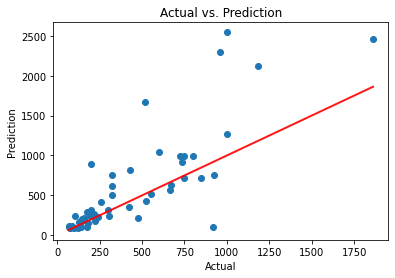

In [201]:
plt.scatter(x = y_test, y = pred_ann)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# add 45' line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')

> Consider the results, we should use **Ensemble-Learning** models for prediction in this Case-Study.